In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
sheets_dict = pd.read_excel('./data.xlsx',sheet_name=None)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
sheets_dict.keys()

dict_keys(['State_Txn and Users', 'State_TxnSplit', 'State_DeviceData', 'District_Txn and Users', 'District Demographics', 'Admin'])

In [5]:
l = ['State_TxnandUsers_df','State_TxnSplit_df','State_DeviceData_df','District_TxnandUsers_df','DistrictDemographics_df']
for (sheet_name,df),i in zip(sheets_dict.items(),l):
    globals()[i] = df
    

#### 1

##### 1.1 Load each Dataset and display its Structure

In [10]:
State_TxnandUsers_df['Year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [6]:
# first five rows
State_TxnandUsers_df.head()

State  Year  Quarter  Transactions  Amount (INR)  \
0  Andaman & Nicobar Islands  2018        1          6658  1.463176e+07   
1  Andaman & Nicobar Islands  2018        2         11340  2.833854e+07   
2  Andaman & Nicobar Islands  2018        3         16265  5.555747e+07   
3  Andaman & Nicobar Islands  2018        4         23758  9.054834e+07   
4  Andaman & Nicobar Islands  2019        1         30486  1.022997e+08   

     ATV (INR)  Registered Users  App Opens  
0  2197.621091              6740          0  
1  2498.989022              9405          0  
2  3415.768284             12149          0  
3  3811.277720             15222          0  
4  3355.630147             18596          0

In [7]:
# last 10 rows
State_TxnSplit_df.tail(10)

State  Year  Quarter          Transaction Type  Transactions  \
2504  West Bengal  2021        1     Peer-to-peer payments      53869075   
2505  West Bengal  2021        1         Merchant payments      37143701   
2506  West Bengal  2021        1  Recharge & bill payments      26673733   
2507  West Bengal  2021        1        Financial Services        166727   
2508  West Bengal  2021        1                    Others        400816   
2509  West Bengal  2021        2     Peer-to-peer payments      64661051   
2510  West Bengal  2021        2         Merchant payments      41696787   
2511  West Bengal  2021        2  Recharge & bill payments      34799709   
2512  West Bengal  2021        2        Financial Services        190537   
2513  West Bengal  2021        2                    Others        549353   

      Amount (INR)    ATV (INR)  
2504  2.022402e+11  3754.292226  
2505  2.891834e+10   778.553104  
2506  1.133967e+10   425.124820  
2507  1.754458e+08  1052.293941  
2508  2.635025e+08   657.415236  
2509  2.308123e+11  3569.572026  
2510  3.478787e+10   834.305703  
2511  1.333145e+10   383.090958  
2512  1.864665e+08   978.636630  
2513  3.167447e+08   576.577748

In [8]:
# middle 10 rows
rows = State_DeviceData_df.shape[0]
mid = rows // 2
State_DeviceData_df.iloc[mid-5:mid+4]

State  Year  Quarter     Brand  Registered Users  Percentage
2767       Ladakh  2021        2   OnePlus              1741    0.023198
2768       Ladakh  2021        2  Motorola               922    0.012285
2769       Ladakh  2021        2    Huawei               894    0.011912
2770       Ladakh  2021        2    Lenovo               490    0.006529
2771       Ladakh  2021        2    Others              2610    0.034778
2772  Lakshadweep  2018        1   Samsung               102    0.203593
2773  Lakshadweep  2018        1    Xiaomi               100    0.199601
2774  Lakshadweep  2018        1      Vivo                67    0.133733
2775  Lakshadweep  2018        1      Oppo                56    0.111776

In [9]:
# first 10 and last 10 rows
pd.concat([District_TxnandUsers_df.head(10),District_TxnandUsers_df.tail(10)])

State  Year  Quarter                    District  \
0      Andaman & Nicobar Islands  2018        1                    Nicobars   
1      Andaman & Nicobar Islands  2018        1    North And Middle Andaman   
2      Andaman & Nicobar Islands  2018        1               South Andaman   
3      Andaman & Nicobar Islands  2018        2                    Nicobars   
4      Andaman & Nicobar Islands  2018        2    North And Middle Andaman   
5      Andaman & Nicobar Islands  2018        2               South Andaman   
6      Andaman & Nicobar Islands  2018        3                    Nicobars   
7      Andaman & Nicobar Islands  2018        3    North And Middle Andaman   
8      Andaman & Nicobar Islands  2018        3               South Andaman   
9      Andaman & Nicobar Islands  2018        4                    Nicobars   
10238                West Bengal  2021        2                 Murshidabad   
10239                West Bengal  2021        2                       Nadia   
10240                West Bengal  2021        2  North Twenty Four Parganas   
10241                West Bengal  2021        2           Paschim Bardhaman   
10242                West Bengal  2021        2           Paschim Medinipur   
10243                West Bengal  2021        2             Purba Bardhaman   
10244                West Bengal  2021        2             Purba Medinipur   
10245                West Bengal  2021        2                     Purulia   
10246                West Bengal  2021        2  South Twenty Four Parganas   
10247                West Bengal  2021        2              Uttar Dinajpur   

       Code  Transactions  Amount (INR)    ATV (INR)  Registered Users  \
0      AN01           528  1.139849e+06  2158.804548               262   
1      AN02           442  9.316631e+05  2107.835016               632   
2      AN03          5688  1.256025e+07  2208.201361              5846   
3      AN01          1120  3.072437e+06  2743.247239               351   
4      AN02           825  1.317863e+06  1597.409798               911   
5      AN03          9395  2.394824e+07  2549.040502              8143   
6      AN01          1471  6.387829e+06  4342.507921               467   
7      AN02          1283  4.901530e+06  3820.365954              1208   
8      AN03         13511  4.426811e+07  3276.449742             10474   
9      AN01          1485  7.180859e+06  4835.595525               536   
10238  WB14       8602251  1.999694e+10  2324.616616           1248602   
10239  WB15       5524174  1.122758e+10  2032.445525            955428   
10240  WB16      17258291  3.041482e+10  1762.331031           2660664   
10241  WB17       4893774  8.731263e+09  1784.157359            789026   
10242  WB18       5051834  1.030351e+10  2039.558976            856640   
10243  WB19       3920729  7.572502e+09  1931.401639            787970   
10244  WB20       6418522  1.515507e+10  2361.146027            946277   
10245  WB21       1895981  2.790996e+09  1472.059252            435131   
10246  WB22       6661813  1.339853e+10  2011.243709           1286588   
10247  WB23       2253385  5.564221e+09  2469.272118            392388   

       App Opens  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0  
10238   16530655  
10239   13665885  
10240   37899453  
10241   10545670  
10242   16201033  
10243   12128849  
10244   15491958  
10245    8843358  
10246   19344293  
10247    8184990

In [10]:
# every 10th row
total_rows = DistrictDemographics_df.shape[0]
every_10_row = [i for i in range(0,total_rows,10)]
DistrictDemographics_df.iloc[every_10_row]

State       District   Headquarters  Population  \
0       Andhra Pradesh      Anantapur      Anantapur     4083315   
10      Andhra Pradesh  Visakhapatnam  Visakhapatnam     4288113   
20   Arunachal Pradesh      Lepa Rada          Basar           0   
30   Arunachal Pradesh          Siang         Pangin       31920   
40               Assam        Barpeta        Barpeta     1693622   
..                 ...            ...            ...         ...   
700         Chandigarh     Chandigarh     Chandigarh     1055450   
710    Jammu & Kashmir          Jammu          Jammu     1526406   
720    Jammu & Kashmir          Samba          Samba      318611   
730              Delhi    North Delhi   Sadar Bazaar      887978   
740         Puducherry     Puducherry    Pondicherry      950289   

     Area (sq km)  Density  Code Alternate Name  
0         19130.0      213  AP01      Anantapur  
10        11161.0      384  AP10  Visakhapatnam  
20            0.0        0  AR08      Lepa Rada  
30         2919.0       11  AR18          Siang  
40         3245.0      520  AS03        Barpeta  
..            ...      ...   ...            ...  
700         114.0     9258  CH01     Chandigarh  
710        3097.0      596  JK07          Jammu  
720         913.0      318  JK17          Samba  
730          59.0    14557  DL04          North  
740         293.0     3232  PY03     Puducherry  

[75 rows x 8 columns]

##### 1.2 Display basic stats and data type for each columns

In [11]:
shape1_State_TxnandUsers_df = State_TxnandUsers_df.shape 
shape1_State_TxnandUsers_df

(504, 8)

In [12]:
#   State_Txn and Users dataframe
State_TxnandUsers_df.dtypes

State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [13]:
State_TxnandUsers_df.describe(include=[np.number])

Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.930574e+06  
75%        7.320945e+06  8.615022e+07  
max        3.966470e+07  1.208084e+09

In [14]:
State_TxnandUsers_df['State'].unique()
State_TxnandUsers_df['State'].nunique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli and Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

36

In [15]:
shape2_State_TxnSplit_df = State_TxnSplit_df.shape
shape2_State_TxnSplit_df

(2514, 7)

In [16]:
#  State_Txn Split dataframe
State_TxnSplit_df.dtypes

State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

In [17]:
State_TxnSplit_df['State'].unique()
State_TxnSplit_df['Transaction Type'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli and Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

array(['Recharge & bill payments', 'Peer-to-peer payments',
       'Merchant payments', 'Financial Services', 'Others'], dtype=object)

In [18]:
State_TxnSplit_df.describe(include=[object])

State          Transaction Type
count                        2514                      2514
unique                         36                         5
top     Andaman & Nicobar Islands  Recharge & bill payments
freq                           70                       504

In [19]:
State_TxnSplit_df.describe(include=[np.number])

Year      Quarter  Transactions  Amount (INR)    ATV (INR)
count  2514.000000  2514.000000  2.514000e+03  2.514000e+03  2514.000000
mean   2019.286794     2.358393  8.167446e+06  1.443978e+10  1349.927929
std       1.030807     1.109251  2.423645e+07  5.995054e+10  1534.866221
min    2018.000000     1.000000  2.000000e+00  3.439721e+01    17.198606
25%    2018.000000     1.000000  2.788075e+04  1.762412e+07   385.735827
50%    2019.000000     2.000000  2.687980e+05  1.901189e+08   720.940406
75%    2020.000000     3.000000  3.683230e+06  2.661248e+09  1352.790116
max    2021.000000     4.000000  2.795990e+08  8.721520e+11  7767.539936

In [20]:
# State Device dataframe
State_DeviceData_df.dtypes

State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

In [21]:
shape3_State_DeviceData_df = State_DeviceData_df.shape
shape3_State_DeviceData_df

(5544, 6)

In [22]:
State_DeviceData_df['Brand'].unique()

array(['Xiaomi', 'Samsung', 'Vivo', 'Oppo', 'OnePlus', 'Realme', 'Apple',
       'Motorola', 'Lenovo', 'Huawei', 'Others', 'Tecno', 'Gionee',
       'Asus', 'Micromax', 'Infinix', 'HMD Global', 'Lava', 'COOLPAD',
       'Lyf'], dtype=object)

In [23]:
State_DeviceData_df.describe(include=[object])

State   Brand
count                        5544    5544
unique                         36      20
top     Andaman & Nicobar Islands  Xiaomi
freq                          154     504

In [24]:
State_DeviceData_df.describe()

Year      Quarter  Registered Users   Percentage
count  5544.000000  5544.000000      5.544000e+03  5544.000000
mean   2019.285714     2.357143      4.343183e+05     0.090909
std       1.030250     1.108970      9.056069e+05     0.083095
min    2018.000000     1.000000      1.000000e+01     0.006373
25%    2018.000000     1.000000      8.055750e+03     0.021588
50%    2019.000000     2.000000      7.442250e+04     0.056914
75%    2020.000000     3.000000      3.978875e+05     0.143626
max    2021.000000     4.000000      9.764252e+06     0.478367

In [25]:
# District wise transaction and user dataframe
District_TxnandUsers_df.dtypes

State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [26]:
shape4_District_TxnandUsers_df = District_TxnandUsers_df.shape
shape4_District_TxnandUsers_df

(10248, 10)

In [27]:
District_TxnandUsers_df.describe(include=[object])

State   District   Code
count           10248      10248  10220
unique             36        723    730
top     Uttar Pradesh  Balrampur   WB23
freq             1050         28     14

In [28]:
District_TxnandUsers_df.describe()

Year       Quarter  Transactions  Amount (INR)     ATV (INR)  \
count  10248.000000  10248.000000  1.024800e+04  1.024800e+04  10244.000000   
mean    2019.285714      2.357143  2.003607e+06  3.542311e+09   1909.796545   
std        1.030208      1.108924  9.613466e+06  1.473154e+10    600.943349   
min     2018.000000      1.000000  0.000000e+00  0.000000e+00     84.944283   
25%     2018.000000      1.000000  1.031418e+05  1.756668e+08   1554.589051   
50%     2019.000000      2.000000  3.763065e+05  6.784562e+08   1863.135530   
75%     2020.000000      3.000000  1.272815e+06  2.377256e+09   2203.083552   
max     2021.000000      4.000000  3.487128e+08  4.444224e+11  11209.980550   

       Registered Users     App Opens  
count      1.024800e+04  1.024800e+04  
mean       2.349591e+05  4.807117e+06  
std        4.605978e+05  1.562541e+07  
min        2.200000e+01  0.000000e+00  
25%        3.619550e+04  0.000000e+00  
50%        1.067640e+05  6.403025e+05  
75%        2.573165e+05  4.346320e+06  
max        1.060461e+07  5.544197e+08

In [29]:
# demographics data of Districts dataframe
DistrictDemographics_df.dtypes

State              object
District           object
Headquarters       object
Population          int64
Area (sq km)      float64
Density             int64
Code               object
Alternate Name     object
dtype: object

In [30]:
shape5_DistrictDemographics_df = DistrictDemographics_df.shape
shape5_DistrictDemographics_df

(742, 8)

In [31]:
DistrictDemographics_df.describe(exclude=[np.number])

State District Headquarters  Code Alternate Name
count             742      742          742   742            742
unique             36      736          733   742            733
top     Uttar Pradesh  Bijapur    Bangalore  PY04      Balrampur
freq               75        2            2     1              2

##### 1.3 check for missing values

In [32]:
for column in State_TxnandUsers_df.columns:
    State_TxnandUsers_df[column].isnull().value_counts()

State
False    504
Name: count, dtype: int64

Year
False    504
Name: count, dtype: int64

Quarter
False    504
Name: count, dtype: int64

Transactions
False    504
Name: count, dtype: int64

Amount (INR)
False    503
True       1
Name: count, dtype: int64

ATV (INR)
False    504
Name: count, dtype: int64

Registered Users
False    504
Name: count, dtype: int64

App Opens
False    504
Name: count, dtype: int64

Null value in `Amount (INR)` column of `State_TxnandUsers_df`

In [33]:
State_TxnandUsers_df.loc[State_TxnandUsers_df['Amount (INR)'].isnull()]

State  Year  Quarter  Transactions  Amount (INR)  ATV (INR)  \
26  Andhra Pradesh  2021        1     289747970           NaN        0.0   

    Registered Users  App Opens  
26          18363733  957709447

In [34]:
State_TxnandUsers_df.loc[ ( State_TxnandUsers_df['State'] == 'Andhra Pradesh')]

State  Year  Quarter  Transactions  Amount (INR)    ATV (INR)  \
14  Andhra Pradesh  2018        1       9039585  1.199628e+10  1327.082647   
15  Andhra Pradesh  2018        2      12353918  2.288391e+10  1852.360868   
16  Andhra Pradesh  2018        3      25626061  3.571804e+10  1393.817200   
17  Andhra Pradesh  2018        4      30759548  5.147378e+10  1673.424441   
18  Andhra Pradesh  2019        1      57264522  8.376060e+10  1462.696151   
19  Andhra Pradesh  2019        2      56409015  1.136345e+11  2014.474437   
20  Andhra Pradesh  2019        3      76288614  1.394479e+11  1827.899826   
21  Andhra Pradesh  2019        4     107218103  2.009483e+11  1874.201370   
22  Andhra Pradesh  2020        1     127677357  2.527372e+11  1979.499108   
23  Andhra Pradesh  2020        2     144917855  3.025837e+11  2087.966936   
24  Andhra Pradesh  2020        3     204902935  4.670841e+11  2279.538507   
25  Andhra Pradesh  2020        4     286118552  6.548415e+11  2288.707046   
26  Andhra Pradesh  2021        1     289747970           NaN     0.000000   
27  Andhra Pradesh  2021        2     352767134  8.507375e+11  2411.612129   

    Registered Users   App Opens  
14           3336450           0  
15           4402540           0  
16           5427617           0  
17           6857409           0  
18           8283019           0  
19           9389003    81375251  
20          10458693   310953542  
21          11757883   411201518  
22          13022060   486513773  
23          14319675   494341698  
24          15692405   696300382  
25          17076565   869078538  
26          18363733   957709447  
27          19620905  1044705436

In [35]:
# to get data of andhra pradesh state
temp_df = State_TxnandUsers_df.loc[ ( State_TxnandUsers_df['State'] == 'Andhra Pradesh')]

In [36]:
temp_df.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [37]:
# to calculate quarterly growth of amount,atv and transactions of andhra pradesh
temp_df['Amount Quarter Increase'],temp_df['ATV Quarter Increase'] = temp_df['Amount (INR)'] - temp_df['Amount (INR)'].shift(1),temp_df['ATV (INR)'] - temp_df['ATV (INR)'].shift(1)
temp_df['Transaction Quarter Increase'] = temp_df['Transactions'] - temp_df['Transactions'].shift(1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\1028018942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Amount Quarter Increase'],temp_df['ATV Quarter Increase'] = temp_df['Amount (INR)'] - temp_df['Amount (INR)'].shift(1),temp_df['ATV (INR)'] - temp_df['ATV (INR)'].shift(1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\1028018942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Amount Quarter Increase'],temp_df['ATV Quarter Increase'] = temp_df['Amount (INR)'] - temp_df['Amo

In [38]:
temp_df

State  Year  Quarter  Transactions  Amount (INR)    ATV (INR)  \
14  Andhra Pradesh  2018        1       9039585  1.199628e+10  1327.082647   
15  Andhra Pradesh  2018        2      12353918  2.288391e+10  1852.360868   
16  Andhra Pradesh  2018        3      25626061  3.571804e+10  1393.817200   
17  Andhra Pradesh  2018        4      30759548  5.147378e+10  1673.424441   
18  Andhra Pradesh  2019        1      57264522  8.376060e+10  1462.696151   
19  Andhra Pradesh  2019        2      56409015  1.136345e+11  2014.474437   
20  Andhra Pradesh  2019        3      76288614  1.394479e+11  1827.899826   
21  Andhra Pradesh  2019        4     107218103  2.009483e+11  1874.201370   
22  Andhra Pradesh  2020        1     127677357  2.527372e+11  1979.499108   
23  Andhra Pradesh  2020        2     144917855  3.025837e+11  2087.966936   
24  Andhra Pradesh  2020        3     204902935  4.670841e+11  2279.538507   
25  Andhra Pradesh  2020        4     286118552  6.548415e+11  2288.707046   
26  Andhra Pradesh  2021        1     289747970           NaN     0.000000   
27  Andhra Pradesh  2021        2     352767134  8.507375e+11  2411.612129   

    Registered Users   App Opens  Amount Quarter Increase  \
14           3336450           0                      NaN   
15           4402540           0             1.088764e+10   
16           5427617           0             1.283413e+10   
17           6857409           0             1.575573e+10   
18           8283019           0             3.228682e+10   
19           9389003    81375251             2.987392e+10   
20          10458693   310953542             2.581343e+10   
21          11757883   411201518             6.150037e+10   
22          13022060   486513773             5.178890e+10   
23          14319675   494341698             4.984648e+10   
24          15692405   696300382             1.645004e+11   
25          17076565   869078538             1.877574e+11   
26          18363733   957709447                      NaN   
27          19620905  1044705436                      NaN   

    ATV Quarter Increase  Transaction Quarter Increase  
14                   NaN                           NaN  
15            525.278221                     3314333.0  
16           -458.543668                    13272143.0  
17            279.607240                     5133487.0  
18           -210.728290                    26504974.0  
19            551.778286                     -855507.0  
20           -186.574611                    19879599.0  
21             46.301544                    30929489.0  
22            105.297738                    20459254.0  
23            108.467829                    17240498.0  
24            191.571571                    59985080.0  
25              9.168539                    81215617.0  
26          -2288.707046                     3629418.0  
27           2411.612129                    63019164.0

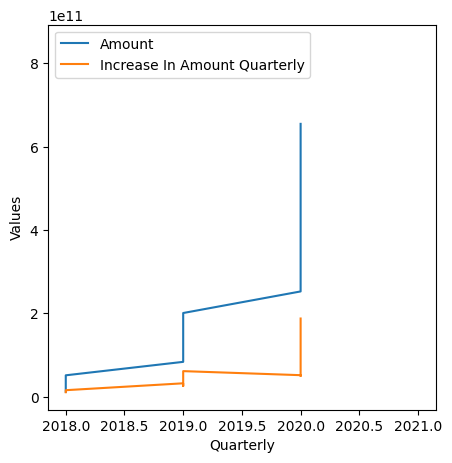

In [39]:
# to observe growth of amount over time
plt.figure(figsize=(5,5))
plt.plot(temp_df['Year'],temp_df['Amount (INR)'],label='Amount')
plt.plot(temp_df['Year'],temp_df['Amount Quarter Increase'],label='Increase In Amount Quarterly')
plt.legend()
plt.ylabel('Values')
plt.xlabel('Quarterly')
plt.show();

In [40]:
temp_df.loc[:,'Growth Rate Quarterly'] = (temp_df['Amount (INR)'] - temp_df['Amount (INR)'].shift(1)) / temp_df['Amount (INR)'].shift(1) * 100

C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\3589466334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[:,'Growth Rate Quarterly'] = (temp_df['Amount (INR)'] - temp_df['Amount (INR)'].shift(1)) / temp_df['Amount (INR)'].shift(1) * 100


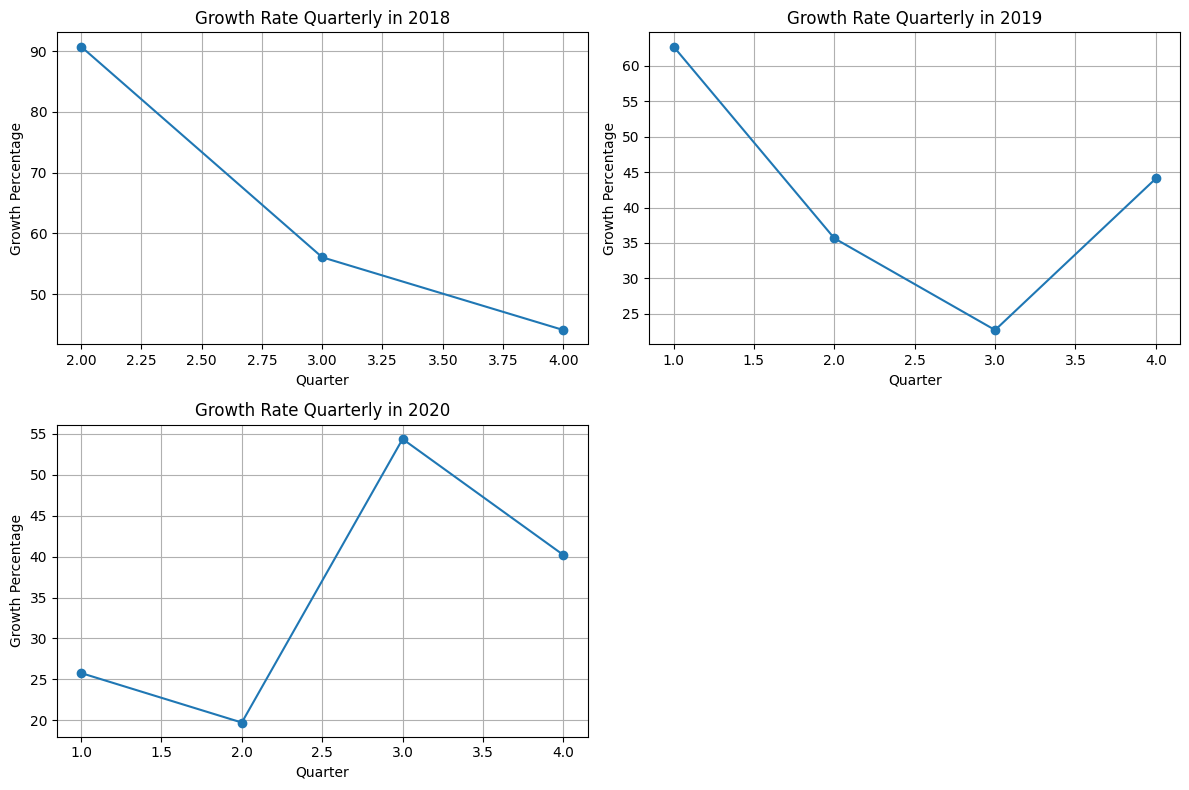

In [41]:
# Get unique years before 2021
unique_years = temp_df.loc[temp_df['Year'] < 2021, 'Year'].unique()
unique_quarter = temp_df['Quarter'].unique()
# Create subplots (one for each year)
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten() # converts axis from 2-D into 1-D array
# Loop through each year and plot separately
for i, year in enumerate(unique_years):
    # ax = axes[i] if len(unique_years) > 1 else axes  # Handle single subplot case
    yearly_data = temp_df.loc[temp_df['Year'] == year]
    axes[i].plot(unique_quarter, yearly_data['Growth Rate Quarterly'], marker='o', linestyle='-')
    axes[i].set_title(f'Growth Rate Quarterly in {year}')
    axes[i].set_xlabel('Quarter')
    axes[i].set_ylabel('Growth Percentage')
    axes[i].grid(True)

if len(unique_years) < 4:
    for j in range(len(unique_years), 4):  
        fig.delaxes(axes[j])  # Delete the empty axis(unused)

plt.tight_layout()  # Adjusting layout to prevent overlap
plt.show();


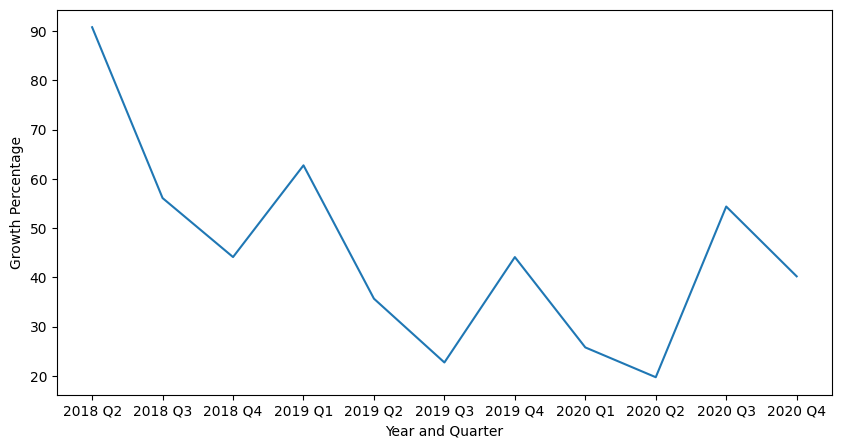

In [42]:
temp_df = temp_df.loc[temp_df['Year'] < 2021]
plt.figure(figsize=(10,5))
unique_q_y = temp_df['Year'].astype(str)+' Q'+temp_df['Quarter'].astype(str)
plt.plot(unique_q_y,temp_df['Growth Rate Quarterly'])
plt.xlabel('Year and Quarter')
plt.ylabel('Growth Percentage')
plt.show();

here as we observe upward trend in total amount in each quarter of 2020
1. We use `extrapolation` to fill missing value 2021 Q1
2. why we only consider 2020 data for exploration?
   1. Because recent data reflects the latest growth pattern better than older data
   2. there may be different growth rate in 2020 than in 2019,2018 due to policies,market expansion
   3. there is pandemic effect vs before 2019,its significantly effected and increased online payments

In [43]:
avg_growth_rate = temp_df.loc[(temp_df['Year'] == 2020)& (temp_df['Quarter'] > 1) ,'Growth Rate Quarterly'].mean()

In [44]:
extrapolate_value = temp_df.loc[(temp_df['Year'] == 2020) & (temp_df['Quarter'] == 4),'Amount (INR)'] * (1+ (avg_growth_rate / 100))

In [45]:
extrapolate_value

25    9.043049e+11
Name: Amount (INR), dtype: float64

But above extrapolate value is considered too high when compared to increase in number of transaction 
from 2020 q4 to 2021 q1 --->
    lets find out is there relation between `number of transactions` and `total amount value`?

<Figure size 500x1000 with 0 Axes>

Text(0.5, 0, 'Transactions')

Text(0, 0.5, 'Amount')

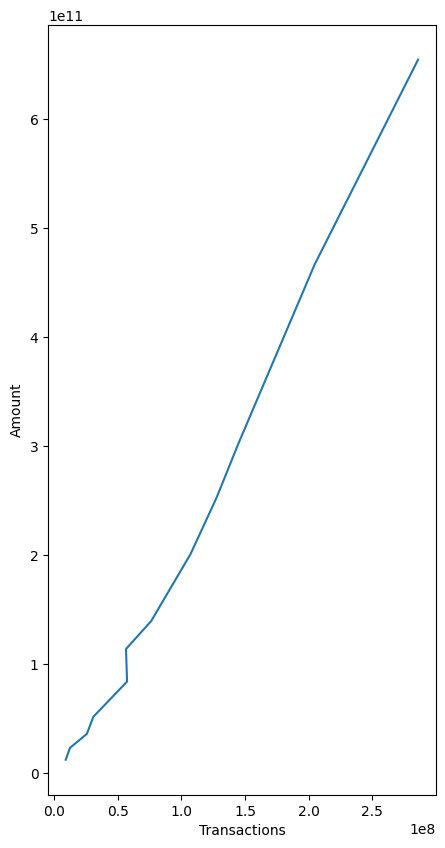

In [46]:
plt.figure(figsize=(5,10))
plt.plot(temp_df['Transactions'],temp_df['Amount (INR)'])
plt.xlabel('Transactions')
plt.ylabel('Amount')
plt.show()

It appears to be nearly a straight line ,lets check correlation

In [47]:
corelation = temp_df['Transactions'].corr(temp_df['Amount (INR)'])
corelation

np.float64(0.9966247072404805)

Corelation is near to 1,So there is strong positive relation.So to extrapolate ,we use growth rate of transaction

In [48]:
temp_df.loc[:,'Transactions Quaterly Growth Rate'] = (temp_df['Transactions'] - temp_df['Transactions'].shift(1))/ temp_df['Transactions'].shift(1) * 100

C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\1890553346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[:,'Transactions Quaterly Growth Rate'] = (temp_df['Transactions'] - temp_df['Transactions'].shift(1))/ temp_df['Transactions'].shift(1) * 100


In [49]:
temp_df

State  Year  Quarter  Transactions  Amount (INR)    ATV (INR)  \
14  Andhra Pradesh  2018        1       9039585  1.199628e+10  1327.082647   
15  Andhra Pradesh  2018        2      12353918  2.288391e+10  1852.360868   
16  Andhra Pradesh  2018        3      25626061  3.571804e+10  1393.817200   
17  Andhra Pradesh  2018        4      30759548  5.147378e+10  1673.424441   
18  Andhra Pradesh  2019        1      57264522  8.376060e+10  1462.696151   
19  Andhra Pradesh  2019        2      56409015  1.136345e+11  2014.474437   
20  Andhra Pradesh  2019        3      76288614  1.394479e+11  1827.899826   
21  Andhra Pradesh  2019        4     107218103  2.009483e+11  1874.201370   
22  Andhra Pradesh  2020        1     127677357  2.527372e+11  1979.499108   
23  Andhra Pradesh  2020        2     144917855  3.025837e+11  2087.966936   
24  Andhra Pradesh  2020        3     204902935  4.670841e+11  2279.538507   
25  Andhra Pradesh  2020        4     286118552  6.548415e+11  2288.707046   

    Registered Users  App Opens  Amount Quarter Increase  \
14           3336450          0                      NaN   
15           4402540          0             1.088764e+10   
16           5427617          0             1.283413e+10   
17           6857409          0             1.575573e+10   
18           8283019          0             3.228682e+10   
19           9389003   81375251             2.987392e+10   
20          10458693  310953542             2.581343e+10   
21          11757883  411201518             6.150037e+10   
22          13022060  486513773             5.178890e+10   
23          14319675  494341698             4.984648e+10   
24          15692405  696300382             1.645004e+11   
25          17076565  869078538             1.877574e+11   

    ATV Quarter Increase  Transaction Quarter Increase  Growth Rate Quarterly  \
14                   NaN                           NaN                    NaN   
15            525.278221                     3314333.0              90.758478   
16           -458.543668                    13272143.0              56.083632   
17            279.607240                     5133487.0              44.111415   
18           -210.728290                    26504974.0              62.724783   
19            551.778286                     -855507.0              35.665843   
20           -186.574611                    19879599.0              22.716183   
21             46.301544                    30929489.0              44.102745   
22            105.297738                    20459254.0              25.772248   
23            108.467829                    17240498.0              19.722650   
24            191.571571                    59985080.0              54.365270   
25              9.168539                    81215617.0              40.197772   

    Transactions Quaterly Growth Rate  
14                                NaN  
15                          36.664659  
16                         107.432662  
17                          20.032291  
18                          86.168282  
19                          -1.493956  
20                          35.241883  
21                          40.542733  
22                          19.081903  
23                          13.503176  
24                          41.392470  
25                          39.636141

In [50]:
# find average of growth rate from 2020 q2 to q4
avg_Transactions_Quaterly_Growth_Rate = temp_df.loc[(temp_df['Year'] == 2020) & (temp_df['Quarter'] > 1),'Transactions Quaterly Growth Rate'].mean()

In [51]:
avg_Transactions_Quaterly_Growth_Rate

np.float64(31.510595811719778)

In [52]:
# calculate extrapolate value
extrapolate_value = temp_df.loc[(temp_df['Year'] == 2020) & (temp_df['Quarter'] == 4),'Amount (INR)'] * (1 +(avg_Transactions_Quaterly_Growth_Rate/100))
extrapolate_value

25    8.611860e+11
Name: Amount (INR), dtype: float64

In [53]:
# find row index of null column data
null_row_index = State_TxnandUsers_df.loc[State_TxnandUsers_df['Amount (INR)'].isnull()].index[0]
null_row_index

np.int64(26)

In [54]:
print(State_TxnandUsers_df['Amount (INR)'].dtype)
print(type(extrapolate_value))


float64
<class 'pandas.core.series.Series'>


In [55]:
# replcae null with extrapolate value
State_TxnandUsers_df.loc[State_TxnandUsers_df['Amount (INR)'].isnull(),'Amount (INR)'] = extrapolate_value.iloc[0]

In [56]:
State_TxnandUsers_df.loc[null_row_index]

State                    Andhra Pradesh
Year                               2021
Quarter                               1
Transactions                  289747970
Amount (INR)        861186018811.109741
ATV (INR)                           0.0
Registered Users               18363733
App Opens                     957709447
Name: 26, dtype: object

In [57]:
# to update atv based on number of transactions and amount
State_TxnandUsers_df.loc[null_row_index,'ATV (INR)'] = extrapolate_value.iloc[0] / State_TxnandUsers_df.loc[null_row_index,'Transactions']

In [58]:
State_TxnandUsers_df.loc[null_row_index]

State                    Andhra Pradesh
Year                               2021
Quarter                               1
Transactions                  289747970
Amount (INR)        861186018811.109741
ATV (INR)                       2972.19
Registered Users               18363733
App Opens                     957709447
Name: 26, dtype: object

In [59]:
# State wise split data dataframe
State_TxnSplit_df.isnull().sum()

State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

No Missing Values

In [60]:
# State wise use of devices df
State_DeviceData_df.isnull().sum()

State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64

No Missing Values

In [61]:
# district transaction and users dataframe
District_TxnandUsers_df.isnull().sum()

State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64

In [62]:
#find state and districts of district code null rows
District_TxnandUsers_df.loc[District_TxnandUsers_df['Code'].isnull(),['State','District']].value_counts()

State            District    
Jammu & Kashmir  Mirpur          14
                 Muzaffarabad    14
Name: count, dtype: int64

District Code missed for two districts (`Muzaffarabad`,`Mirpur`) in `Jammu & Kashmir` State

In [63]:
# def get_district_code(df):
#     x = df['Code'].unique()
#     return x

#get codes of each district in jammu state
code_district_jammu = District_TxnandUsers_df.loc[District_TxnandUsers_df['State'] == 'Jammu & Kashmir'].groupby('District')['Code'].agg(lambda x : x.unique()[0]).reset_index(drop=False)

In [64]:
code_district_jammu

District  Code
0       Anantnag  JK01
1      Bandipore  JK02
2      Baramulla  JK03
3         Budgam  JK04
4           Doda  JK05
5      Ganderbal  JK06
6          Jammu  JK07
7         Kathua  JK08
8       Kishtwar  JK09
9         Kulgam  JK10
10       Kupwara  JK11
11        Mirpur   NaN
12  Muzaffarabad   NaN
13        Poonch  JK12
14       Pulwama  JK13
15       Rajouri  JK14
16        Ramban  JK15
17         Reasi  JK16
18         Samba  JK17
19       Shopian  JK18
20      Srinagar  JK19
21      Udhampur  JK20

In [65]:
#rewrite district code of districts in jammu state
for i,ind in zip(range(1,23),code_district_jammu.index):
    code_district_jammu.loc[ind,'Code'] = 'JK'+str(i).zfill(2)
code_district_jammu

District  Code
0       Anantnag  JK01
1      Bandipore  JK02
2      Baramulla  JK03
3         Budgam  JK04
4           Doda  JK05
5      Ganderbal  JK06
6          Jammu  JK07
7         Kathua  JK08
8       Kishtwar  JK09
9         Kulgam  JK10
10       Kupwara  JK11
11        Mirpur  JK12
12  Muzaffarabad  JK13
13        Poonch  JK14
14       Pulwama  JK15
15       Rajouri  JK16
16        Ramban  JK17
17         Reasi  JK18
18         Samba  JK19
19       Shopian  JK20
20      Srinagar  JK21
21      Udhampur  JK22

In [66]:
#reassign the updated values to original data
District_TxnandUsers_df.loc[District_TxnandUsers_df['State'] == 'Jammu & Kashmir','Code'] = pd.merge(District_TxnandUsers_df.loc[District_TxnandUsers_df['State'] == 'Jammu & Kashmir'].reset_index(),code_district_jammu,how='inner',on='District').set_index('index')['Code_y']

In [67]:
District_TxnandUsers_df.loc[District_TxnandUsers_df['State'] == 'Jammu & Kashmir',['District','Code']].value_counts()

District      Code
Anantnag      JK01    14
Bandipore     JK02    14
Baramulla     JK03    14
Budgam        JK04    14
Doda          JK05    14
Ganderbal     JK06    14
Jammu         JK07    14
Kathua        JK08    14
Kishtwar      JK09    14
Kulgam        JK10    14
Kupwara       JK11    14
Mirpur        JK12    14
Muzaffarabad  JK13    14
Poonch        JK14    14
Pulwama       JK15    14
Rajouri       JK16    14
Ramban        JK17    14
Reasi         JK18    14
Samba         JK19    14
Shopian       JK20    14
Srinagar      JK21    14
Udhampur      JK22    14
Name: count, dtype: int64

In [68]:
#check ATV null valued rows 
District_TxnandUsers_df.loc[District_TxnandUsers_df['ATV (INR)'].isnull()]

State  Year  Quarter  District  Code  Transactions  \
224  Arunachal Pradesh  2018        1     Anjaw  AR01             0   
241  Arunachal Pradesh  2018        1  Shi Yomi  AR17             0   
266  Arunachal Pradesh  2018        2  Shi Yomi  AR17             0   
291  Arunachal Pradesh  2018        3  Shi Yomi  AR17             0   

     Amount (INR)  ATV (INR)  Registered Users  App Opens  
224           0.0        NaN               278          0  
241           0.0        NaN                49          0  
266           0.0        NaN                80          0  
291           0.0        NaN               118          0

In [69]:
# replacing null values in ATV column as there are no transations happened
District_TxnandUsers_df.loc[District_TxnandUsers_df['ATV (INR)'].isnull(),'ATV (INR)'] = 0

In [70]:
# checking for null values if remaining
District_TxnandUsers_df.isnull().sum()

State               0
Year                0
Quarter             0
District            0
Code                0
Transactions        0
Amount (INR)        0
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64

No missing values after changes in `District_TxnandUsers_df`

In [71]:
# missing values in Demographics of districts dataframe
DistrictDemographics_df.isnull().sum()

State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64

No Missing values in `DistrictDemographics_df`

##### 1.4 Create a summary

In [72]:
print("Total number of States:" ,State_TxnandUsers_df['State'].nunique())

Total number of States: 36


In [73]:
DistrictDemographics_df.columns

Index(['State', 'District', 'Headquarters', 'Population', 'Area (sq km)',
       'Density', 'Code', 'Alternate Name'],
      dtype='object')

In [74]:
print("Total number of districts:",DistrictDemographics_df['District'].nunique())

Total number of districts: 736


In [75]:
DistrictDemographics_df.groupby('State')['District'].count()

State
Andaman & Nicobar Islands                3
Andhra Pradesh                          13
Arunachal Pradesh                       25
Assam                                   34
Bihar                                   38
Chandigarh                               1
Chhattisgarh                            28
Dadra & Nagar Haveli and Daman & Diu     3
Delhi                                   11
Goa                                      2
Gujarat                                 33
Haryana                                 22
Himachal Pradesh                        12
Jammu & Kashmir                         20
Jharkhand                               24
Karnataka                               31
Kerala                                  14
Ladakh                                   2
Lakshadweep                              1
Madhya Pradesh                          55
Maharashtra                             36
Manipur                                 16
Meghalaya                               11
Mizor

In [76]:
print("State with maximum number of districts :",DistrictDemographics_df.groupby('State')['District'].count().idxmax())

State with maximum number of districts : Uttar Pradesh


In [77]:
State_TxnandUsers_df.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [78]:
# states with highest total transaction amount in each quarter
def get_highest_state(df):
    max_trans_row = df['Transactions'].idxmax()
    return df.loc[max_trans_row]
State_TxnandUsers_df.groupby(['Year','Quarter']).apply(get_highest_state)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\3387188594.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  State_TxnandUsers_df.groupby(['Year','Quarter']).apply(get_highest_state)


State  Year  Quarter  Transactions  Amount (INR)  \
Year Quarter                                                           
2018 1        Maharashtra  2018        1      16387034  2.171161e+10   
     2        Maharashtra  2018        2      22285740  3.635706e+10   
     3        West Bengal  2018        3      53705416  4.184393e+10   
     4        Maharashtra  2018        4      46090223  7.951894e+10   
2019 1          Karnataka  2019        1      86587609  1.179764e+11   
     2          Karnataka  2019        2     115401604  1.637020e+11   
     3          Karnataka  2019        3     170733735  2.145367e+11   
     4          Karnataka  2019        4     237796252  2.950471e+11   
2020 1          Karnataka  2020        1     271033890  3.534021e+11   
     2          Karnataka  2020        2     213221712  3.211049e+11   
     3          Karnataka  2020        3     300360531  4.707405e+11   
     4          Karnataka  2020        4     431536984  6.580367e+11   
2021 1          Karnataka  2021        1     523797492  7.549954e+11   
     2        Maharashtra  2021        2     573616486  9.151151e+11   

                ATV (INR)  Registered Users   App Opens  
Year Quarter                                             
2018 1        1324.926357           6106994           0  
     2        1631.404532           8222371           0  
     3         779.138070           4851740           0  
     4        1725.288616          13381602           0  
2019 1        1362.508834          10266174           0  
     2        1418.542018          11968087   113024811  
     3        1256.557296          13635075   445683660  
     4        1240.756071          15385416   569674870  
2020 1        1303.903563          17016980   626488036  
     2        1505.967071          18655366   490510075  
     3        1567.251576          20487550   693683212  
     4        1524.867446          22400182   935510690  
2021 1        1441.387882          24095832  1084917385  
     2        1595.343017          39664697  1208083592

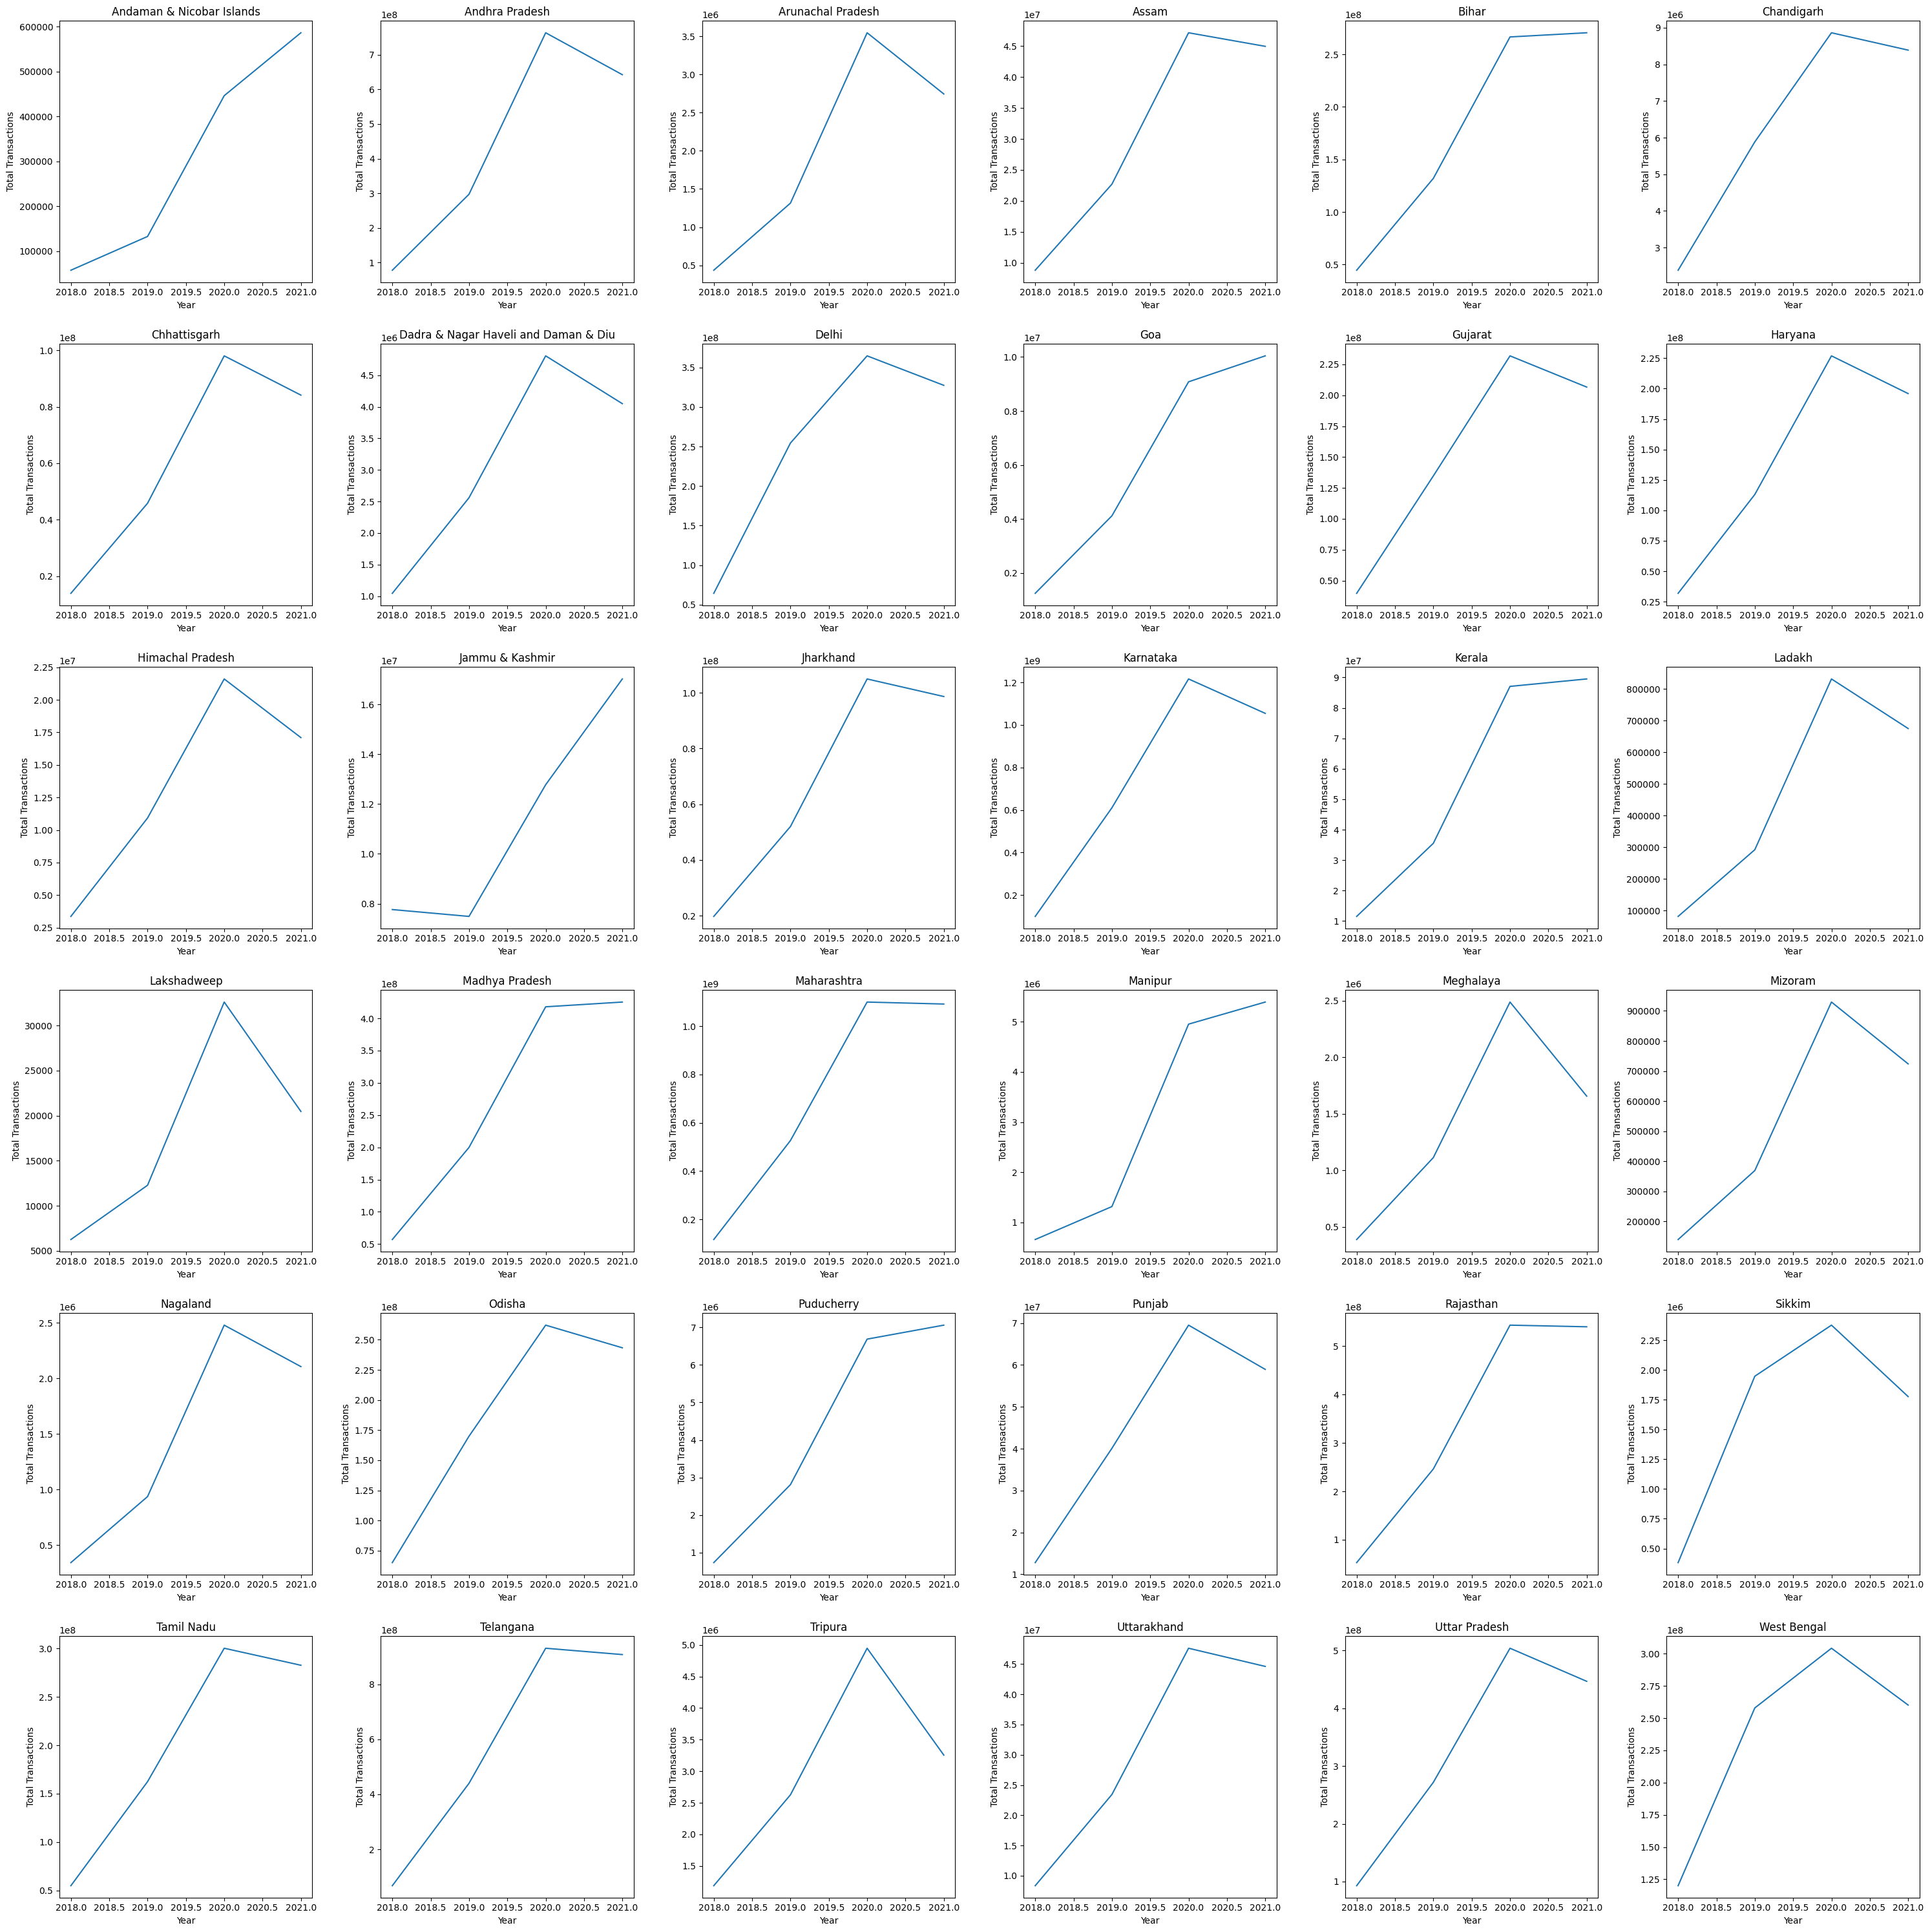

In [79]:
# visualize each state transactions over years
states = State_TxnandUsers_df['State'].unique()
figs , axes = plt.subplots(6,6,figsize=(30,30))
axes = axes.flatten()
for i,state in enumerate(states):
    state_data = State_TxnandUsers_df.loc[State_TxnandUsers_df['State'] == state]
    years = state_data['Year'].unique()
    axes[i].plot(years,state_data.groupby('Year')['Transactions'].sum())
    axes[i].set_title(f'{state}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Transactions')
plt.tight_layout()
plt.show();

#### 2.Exploratory Data Analysis

##### 2.1 Transaction trends over the years for each state

In [80]:
State_TxnandUsers_df.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [81]:
# total number of transactions and transaction amount for each state over years
State_TxnandUsers_df.groupby(['State','Year'])[['Transactions','Amount (INR)']].sum().reset_index(drop=False)

State  Year  Transactions  Amount (INR)
0    Andaman & Nicobar Islands  2018         58021  1.890761e+08
1    Andaman & Nicobar Islands  2019        133104  4.734648e+08
2    Andaman & Nicobar Islands  2020        446274  1.296423e+09
3    Andaman & Nicobar Islands  2021        586166  1.682854e+09
4               Andhra Pradesh  2018      77779112  1.220720e+11
..                         ...   ...           ...           ...
139                Uttarakhand  2021      44608834  7.727901e+10
140                West Bengal  2018     120011635  1.115887e+11
141                West Bengal  2019     257900590  2.660145e+11
142                West Bengal  2020     304222327  5.527316e+11
143                West Bengal  2021     260151489  5.223720e+11

[144 rows x 4 columns]

In [82]:
# top 5 states with highest transaction volumes
State_TxnandUsers_df.groupby('State')['Transactions'].sum().sort_values(ascending=False).head()

State
Karnataka         2981044533
Maharashtra       2833670154
Telangana         2347430243
Andhra Pradesh    1781091169
Rajasthan         1382918930
Name: Transactions, dtype: int64

In [83]:
# top 5 states with lowest transaction volumes
State_TxnandUsers_df.groupby('State')['Transactions'].sum().sort_values().head()

State
Lakshadweep                    71610
Andaman & Nicobar Islands    1223565
Ladakh                       1880109
Mizoram                      2162776
Meghalaya                    5648913
Name: Transactions, dtype: int64

##### 2.2 Most common transaction type in each state and quarter

In [84]:
State_TxnSplit_df.columns

Index(['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions',
       'Amount (INR)', 'ATV (INR)'],
      dtype='object')

In [85]:
# sum transactions using groupby 
most_common_df = State_TxnSplit_df.groupby(['State','Quarter','Transaction Type'])['Transactions'].sum().reset_index(drop=False)
# find index of max transaction valued rows and locate them
most_common_df.loc[most_common_df.groupby(['State','Quarter'])['Transactions'].idxmax()].reset_index(drop=True)

State  Quarter          Transaction Type  \
0    Andaman & Nicobar Islands        1     Peer-to-peer payments   
1    Andaman & Nicobar Islands        2  Recharge & bill payments   
2    Andaman & Nicobar Islands        3  Recharge & bill payments   
3    Andaman & Nicobar Islands        4     Peer-to-peer payments   
4               Andhra Pradesh        1     Peer-to-peer payments   
..                         ...      ...                       ...   
139                Uttarakhand        4     Peer-to-peer payments   
140                West Bengal        1     Peer-to-peer payments   
141                West Bengal        2     Peer-to-peer payments   
142                West Bengal        3     Peer-to-peer payments   
143                West Bengal        4     Peer-to-peer payments   

     Transactions  
0          138772  
1          180447  
2           84165  
3          110018  
4       255236515  
..            ...  
139      11515030  
140     114083760  
141     118087640  
142     100961691  
143     130629804  

[144 rows x 4 columns]

##### 2.3 Device brand with highest registered users in each state

In [86]:
State_DeviceData_df.columns

Index(['State', 'Year', 'Quarter', 'Brand', 'Registered Users', 'Percentage'], dtype='object')

In [87]:
#find total registered users for each brand in each state
ttl_users_state_wise_df = State_DeviceData_df.groupby(['State','Brand'])['Registered Users'].sum().reset_index(drop=False)
#find the brand with highest registered users in each state
ttl_users_state_wise_df.loc[ttl_users_state_wise_df.groupby('State')['Registered Users'].idxmax()].reset_index(drop=True)

State    Brand  Registered Users
0              Andaman & Nicobar Islands   Xiaomi             97889
1                         Andhra Pradesh   Xiaomi          40061549
2                      Arunachal Pradesh   Xiaomi            437803
3                                  Assam   Xiaomi           6979357
4                                  Bihar   Xiaomi          33721314
5                             Chandigarh   Xiaomi            896628
6                           Chhattisgarh   Xiaomi           8763373
7   Dadra & Nagar Haveli and Daman & Diu   Xiaomi            638834
8                                  Delhi   Xiaomi          24114984
9                                    Goa   Xiaomi           1208672
10                               Gujarat   Xiaomi          28942157
11                               Haryana   Xiaomi          21102142
12                      Himachal Pradesh   Xiaomi           3978888
13                       Jammu & Kashmir   Xiaomi           3471820
14                             Jharkhand   Xiaomi          12824023
15                             Karnataka   Xiaomi          52595345
16                                Kerala   Xiaomi          12271469
17                                Ladakh   Xiaomi            167017
18                           Lakshadweep   Xiaomi              6979
19                        Madhya Pradesh   Xiaomi          32789227
20                           Maharashtra   Xiaomi          80281858
21                               Manipur   Xiaomi           1079740
22                             Meghalaya   Xiaomi            347937
23                               Mizoram   Xiaomi            193013
24                              Nagaland   Xiaomi            440693
25                                Odisha   Xiaomi          22935907
26                            Puducherry   Xiaomi            637639
27                                Punjab   Xiaomi          11064360
28                             Rajasthan   Xiaomi          33767499
29                                Sikkim  Samsung            406392
30                            Tamil Nadu   Xiaomi          31519236
31                             Telangana   Xiaomi          38954882
32                               Tripura   Xiaomi            913017
33                         Uttar Pradesh   Xiaomi          64303360
34                           Uttarakhand   Xiaomi           5519705
35                           West Bengal   Xiaomi          38265764

##### 2.4 Top district per state based on population

In [88]:
DistrictDemographics_df.columns

Index(['State', 'District', 'Headquarters', 'Population', 'Area (sq km)',
       'Density', 'Code', 'Alternate Name'],
      dtype='object')

In [89]:
# find top population district index
top_pop_state_index = DistrictDemographics_df.groupby('State')['Population'].idxmax()
DistrictDemographics_df.loc[top_pop_state_index].reset_index(drop=True)

State                District Headquarters  \
0              Andaman & Nicobar Islands           South Andaman   Port Blair   
1                         Andhra Pradesh           East Godavari     Kakinada   
2                      Arunachal Pradesh              Papum Pare        Yupia   
3                                  Assam                  Nagaon       Nagaon   
4                                  Bihar                   Patna        Patna   
5                             Chandigarh              Chandigarh   Chandigarh   
6                           Chhattisgarh                  Raipur       Raipur   
7   Dadra & Nagar Haveli and Daman & Diu  Dadra and Nagar Haveli     Silvassa   
8                                  Delhi        North West Delhi   Kanjhawala   
9                                    Goa               North Goa       Panaji   
10                               Gujarat               Ahmedabad    Ahmedabad   
11                               Haryana               Faridabad    Faridabad   
12                      Himachal Pradesh                  Kangra  Dharamshala   
13                       Jammu & Kashmir                   Jammu        Jammu   
14                             Jharkhand                  Ranchi       Ranchi   
15                             Karnataka         Bangalore Urban    Bangalore   
16                                Kerala              Malappuram   Malappuram   
17                                Ladakh                  Kargil       Kargil   
18                           Lakshadweep             Lakshadweep    Kavaratti   
19                        Madhya Pradesh                  Indore       Indore   
20                           Maharashtra                    Pune         Pune   
21                               Manipur             Imphal West   Lamphelpat   
22                             Meghalaya        East Khasi Hills     Shillong   
23                               Mizoram                  Aizawl       Aizawl   
24                              Nagaland                Tuensang     Tuensang   
25                                Odisha                  Ganjam   Chhatrapur   
26                            Puducherry              Puducherry  Pondicherry   
27                                Punjab                Ludhiana     Ludhiana   
28                             Rajasthan                  Jaipur       Jaipur   
29                                Sikkim             East Sikkim      Gangtok   
30                            Tamil Nadu                 Chennai      Chennai   
31                             Telangana               Hyderabad    Hyderabad   
32                               Tripura            West Tripura     Agartala   
33                         Uttar Pradesh               Allahabad    Allahabad   
34                           Uttarakhand                Haridwar     Haridwar   
35                           West Bengal       North 24 Parganas      Barasat   

    Population  Area (sq km)  Density  Code              Alternate Name  
0       238142       2672.00       89  AN03               South Andaman  
1      5151549      10807.00      477  AP03               East Godavari  
2       176385       2875.00       61  AR16                  Papum Pare  
3      2826006       3831.00      738  AS27                      Nagaon  
4      5772804       3202.00     1803  BR26                       Patna  
5      1055450        114.00     9258  CH01                  Chandigarh  
6      2160876       2892.00      750  CG24                      Raipur  
7       343709        491.00      700  DD01      Dadra and Nagar Haveli  
8      3656539        130.00     8254  DL06                  North West  
9       817761       1736.00      471  GA01                   North Goa  
10     7208200       8707.00      890  GJ01                   Ahmadabad  
11     1798954        783.00     2298  HR04                   Faridabad  
12     1507223       5739.00      263  HP04                      Kangra  
1

##### 2.5 Avg transaction value for each state

In [90]:
State_TxnandUsers_df.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [91]:
# avg transaction value for each state
atv_state_df = State_TxnandUsers_df.groupby('State')['ATV (INR)'].mean().reset_index()
atv_state_df

State    ATV (INR)
0              Andaman & Nicobar Islands  3159.266422
1                         Andhra Pradesh  1960.390762
2                      Arunachal Pradesh  2638.323985
3                                  Assam  2008.495656
4                                  Bihar  2023.316978
5                             Chandigarh  2113.797075
6                           Chhattisgarh  1650.818617
7   Dadra & Nagar Haveli and Daman & Diu  1487.395599
8                                  Delhi  1589.839307
9                                    Goa  1895.258549
10                               Gujarat  1696.101220
11                               Haryana  1831.840325
12                      Himachal Pradesh  1825.338700
13                       Jammu & Kashmir  2508.506029
14                             Jharkhand  1632.342997
15                             Karnataka  1517.392249
16                                Kerala  1671.443173
17                                Ladakh  3408.222984
18                           Lakshadweep  2776.118701
19                        Madhya Pradesh  1601.173668
20                           Maharashtra  1516.361820
21                               Manipur  2621.225756
22                             Meghalaya  2056.276339
23                               Mizoram  2927.517802
24                              Nagaland  2609.942590
25                                Odisha  1428.137367
26                            Puducherry  1927.611843
27                                Punjab  2085.225325
28                             Rajasthan  1757.680992
29                                Sikkim  2087.843818
30                            Tamil Nadu  1861.374354
31                             Telangana  1842.949086
32                               Tripura  1554.156042
33                         Uttar Pradesh  1659.379431
34                           Uttarakhand  1672.608685
35                           West Bengal  1373.600590

In [92]:
# top 5 states with highest avt
atv_state_df.sort_values(by='ATV (INR)',ascending=False).head().reset_index(drop=True)

State    ATV (INR)
0                     Ladakh  3408.222984
1  Andaman & Nicobar Islands  3159.266422
2                    Mizoram  2927.517802
3                Lakshadweep  2776.118701
4          Arunachal Pradesh  2638.323985

In [93]:
# top 5 states with lowest atv
atv_state_df.sort_values(by='ATV (INR)',ascending=True).head().reset_index(drop=True)

State    ATV (INR)
0                           West Bengal  1373.600590
1                                Odisha  1428.137367
2  Dadra & Nagar Haveli and Daman & Diu  1487.395599
3                           Maharashtra  1516.361820
4                             Karnataka  1517.392249

##### 2.6 Analyze app usage trends

In [94]:
# number of app opens per years and quarters for states
State_TxnandUsers_df.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [95]:
State_TxnandUsers_df.groupby(['State','Year','Quarter'])['App Opens'].sum().reset_index()

State  Year  Quarter  App Opens
0    Andaman & Nicobar Islands  2018        1          0
1    Andaman & Nicobar Islands  2018        2          0
2    Andaman & Nicobar Islands  2018        3          0
3    Andaman & Nicobar Islands  2018        4          0
4    Andaman & Nicobar Islands  2019        1          0
..                         ...   ...      ...        ...
499                West Bengal  2020        2  198589332
500                West Bengal  2020        3  246554831
501                West Bengal  2020        4  291721919
502                West Bengal  2021        1  316832674
503                West Bengal  2021        2  275341466

[504 rows x 4 columns]

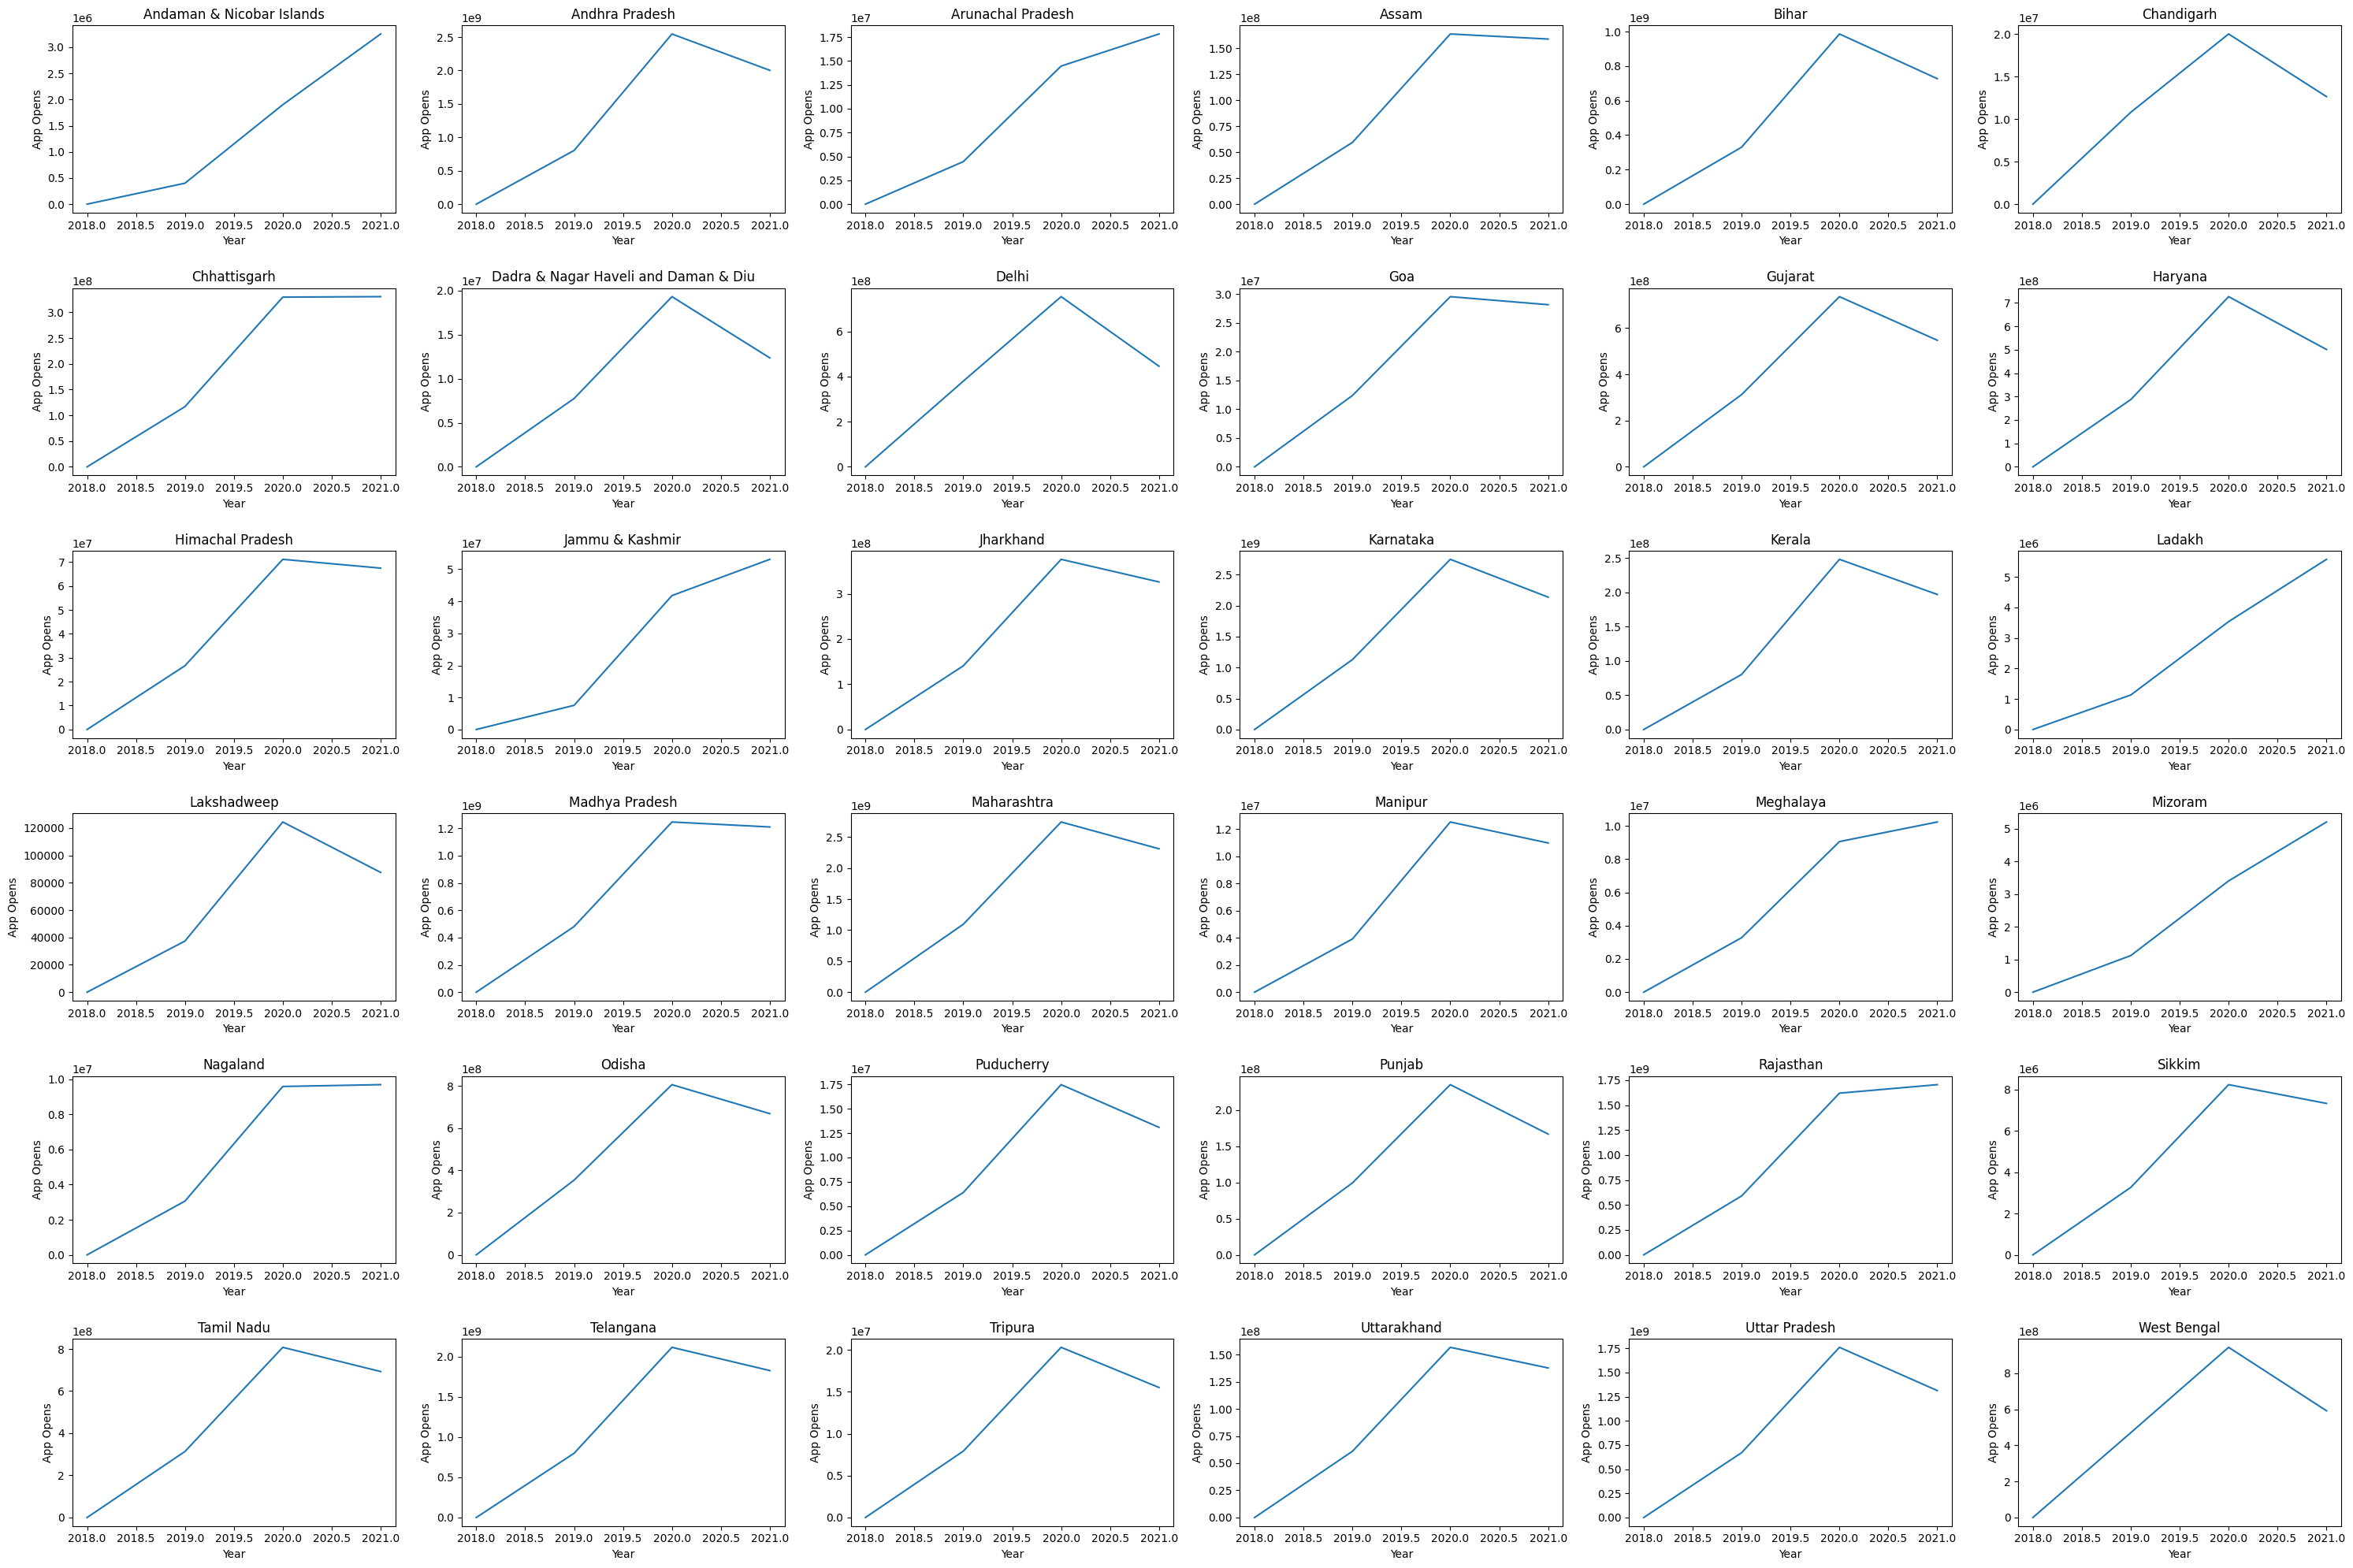

In [96]:
# visualize app opens of each state yearly
states = State_TxnandUsers_df['State'].unique()
years = State_TxnandUsers_df['Year'].unique()
figs , axes = plt.subplots(6,6,figsize=(30,20))
axes = axes.flatten()
for i,state in enumerate(states):
    state_df = State_TxnandUsers_df.loc[State_TxnandUsers_df['State'] == state]
    axes[i].plot(years,state_df.groupby('Year')['App Opens'].sum())
    axes[i].set_title(f'{state}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('App Opens')
plt.tight_layout()
plt.show();

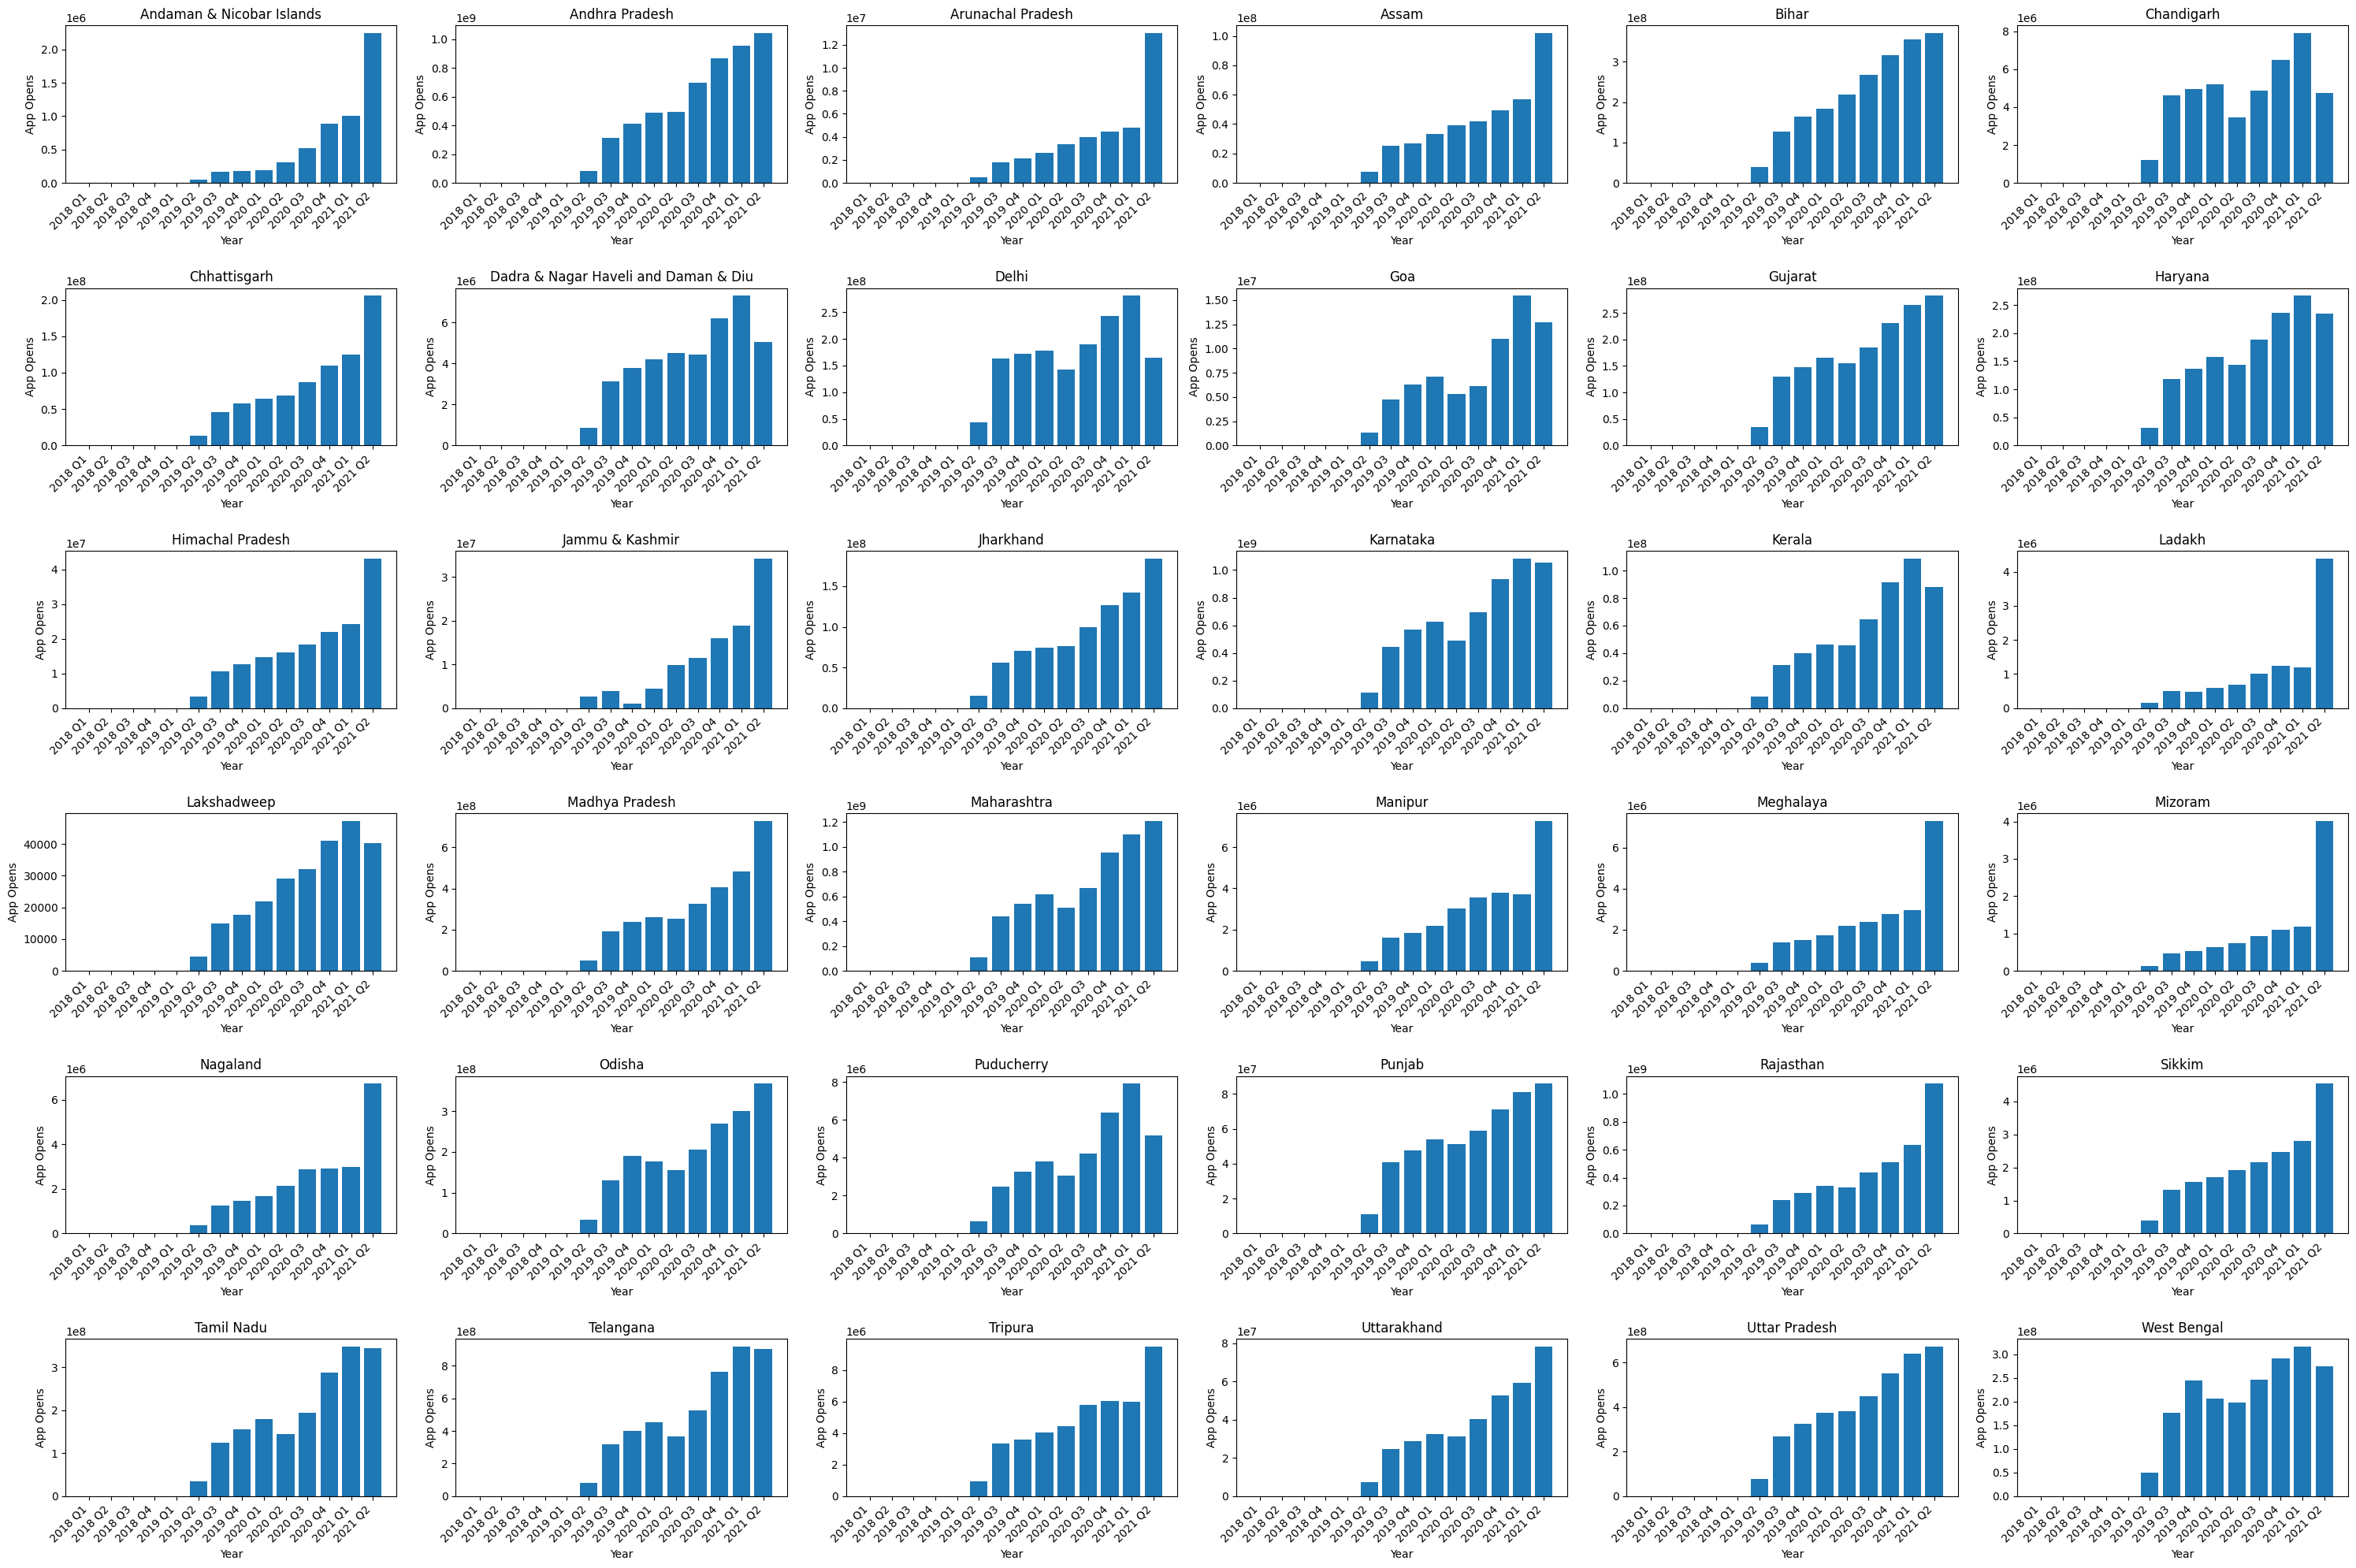

In [97]:
# quaterly app opens of each state
states = State_TxnandUsers_df['State'].unique()
figs , axes = plt.subplots(6,6,figsize=(30,20))
axes = axes.flatten()
for i,state in enumerate(states):
    state_df = State_TxnandUsers_df.loc[State_TxnandUsers_df['State'] == state]
    app_opens_per_year_quarter = state_df.groupby(['Year','Quarter'])[['App Opens']].sum().reset_index()
    axes[i].bar(app_opens_per_year_quarter.index,app_opens_per_year_quarter['App Opens'])
    xaxis_labels = app_opens_per_year_quarter.apply(lambda row: f"{row['Year']} Q{row['Quarter']}",axis=1)
    axes[i].set_title(f'{state}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('App Opens')
    axes[i].set_xticks(app_opens_per_year_quarter.index)
    axes[i].set_xticklabels(xaxis_labels,rotation=45,ha='right')
plt.tight_layout()
plt.show();

##### 2.7 Distribution of transaction types

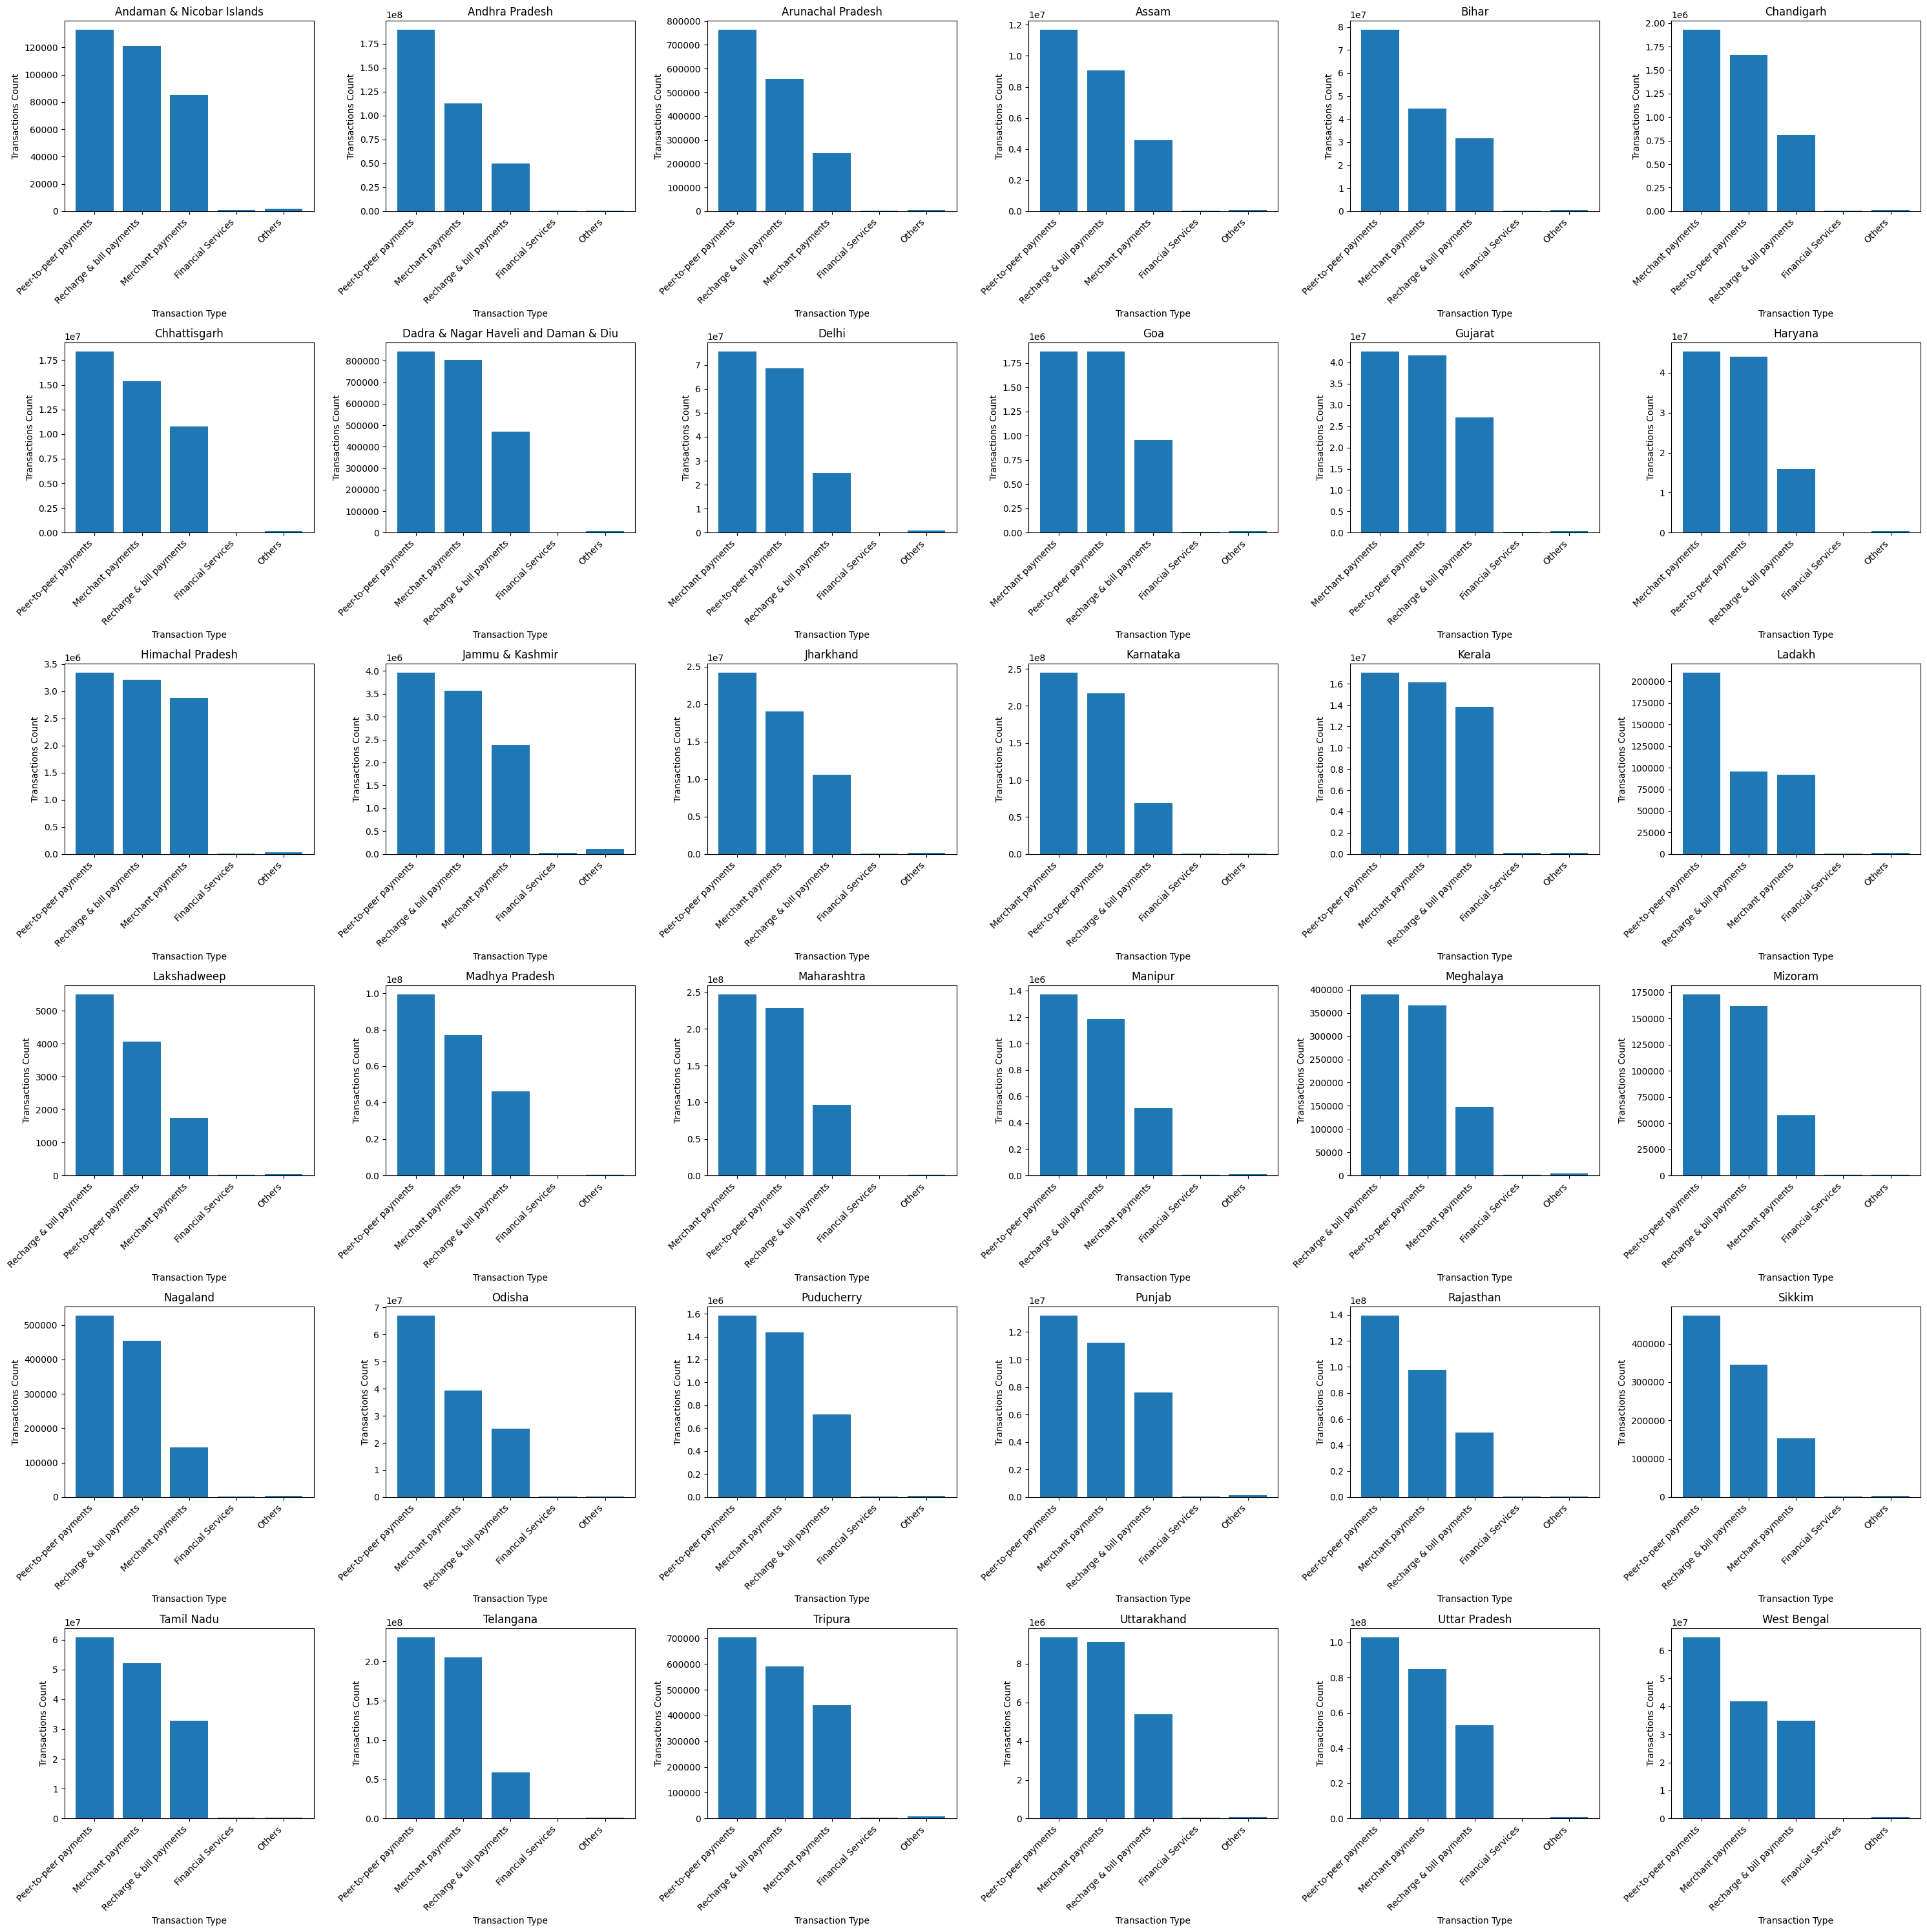

In [98]:
# bar chart of transaction type distributions of each state
states = State_TxnSplit_df['State'].unique()
recent_quarter_df = State_TxnSplit_df.loc[(State_TxnSplit_df['Year'] == 2021) & (State_TxnSplit_df['Quarter'] == 2)]
figs , axes = plt.subplots(6,6,figsize=(30,30))
axes = axes.flatten()
for i,state in enumerate(states):
    state_df = recent_quarter_df.loc[recent_quarter_df['State'] == state]
    axes[i].bar(state_df['Transaction Type'],state_df['Transactions'])
    axes[i].set_title(f'{state}')
    axes[i].set_xlabel('Transaction Type')
    axes[i].set_ylabel('Transactions Count')
    axes[i].set_xticks(state_df['Transaction Type'])
    axes[i].set_xticklabels(state_df['Transaction Type'],rotation=45,ha='right')
plt.tight_layout()
plt.show();

##### 2.8 Unique mapping Between Districts and District Codes

In [99]:
# find if duplicate of districtnames in each district
find_duplicates = DistrictDemographics_df.duplicated(subset=['State','District'])

In [100]:
find_duplicates.value_counts()

False    742
Name: count, dtype: int64

We will consider all Districts as Unique,as there are no duplicates

In [101]:
# consider state ,because there are districts with same name but from states
District_Code_mapping_df = DistrictDemographics_df.drop_duplicates(subset=['State','District','Code'])[['District','Code']]

In [102]:
temp = District_Code_mapping_df.loc[District_Code_mapping_df.duplicated(subset=['District'])]

In [103]:
pd.merge(temp,District_Code_mapping_df,how='inner',on='District')

District Code_x Code_y
0     Bilaspur   HP01   CG07
1     Bilaspur   HP01   HP01
2      Bijapur   KA07   CG06
3      Bijapur   KA07   KA07
4   Aurangabad   MH04   BR03
5   Aurangabad   MH04   MH04
6    Balrampur   UP12   CG03
7    Balrampur   UP12   UP12
8     Hamirpur   UP35   HP03
9     Hamirpur   UP35   UP35
10  Pratapgarh   UP61   RJ26
11  Pratapgarh   UP61   UP61

But here we found that there are similar named Districts in different states,So we should consider State column in creating District mapping

In [104]:
District_Code_mapping_df = District_Code_mapping_df = DistrictDemographics_df.drop_duplicates(subset=['State','District','Code'])[['State','District','Code']]

In [105]:
# create a csv file
District_Code_mapping_df.to_csv('district_mapping.csv',index=False)

#### 3 .Data Quality Checks

##### 3.1 Ensure Data consistency across State and district level

In [106]:
# from District level data
district_level_df = District_TxnandUsers_df.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index(drop=False)
district_level_df

State  Transactions  Amount (INR)  \
0              Andaman & Nicobar Islands       1223565  3.641818e+09   
1                         Andhra Pradesh    1781091169  3.860292e+12   
2                      Arunachal Pradesh       8043799  2.225183e+10   
3                                  Assam     123577981  2.814087e+11   
4                                  Bihar     713643889  1.639579e+12   
5                             Chandigarh      25516542  5.371208e+10   
6                           Chhattisgarh     241908549  4.156353e+11   
7   Dadra & Nagar Haveli and Daman & Diu      12462185  1.865878e+10   
8                                  Delhi    1011031124  1.649942e+12   
9                                    Goa      24481604  4.427187e+10   
10                               Gujarat     612992823  1.105329e+12   
11                               Haryana     567751410  1.059832e+12   
12                      Himachal Pradesh      52987445  9.786546e+10   
13                       Jammu & Kashmir      45053328  1.094954e+11   
14                             Jharkhand     275270987  4.905701e+11   
15                             Karnataka    2981044533  4.361396e+12   
16                                Kerala     223637876  3.729599e+11   
17                                Ladakh       1880109  6.606978e+09   
18                           Lakshadweep         71610  1.921587e+08   
19                        Madhya Pradesh    1100253728  1.915101e+12   
20                           Maharashtra    2833670154  4.290995e+12   
21                               Manipur      12318043  3.579325e+10   
22                             Meghalaya       5648913  1.254162e+10   
23                               Mizoram       2162776  6.317141e+09   
24                              Nagaland       5864977  1.638757e+10   
25                                Odisha     740479146  1.220615e+12   
26                            Puducherry      17292386  3.209769e+10   
27                                Punjab     181336904  3.941773e+11   
28                             Rajasthan    1382918930  2.625584e+12   
29                                Sikkim       6483948  1.415554e+10   
30                            Tamil Nadu     800399873  1.481448e+12   
31                             Telangana    2347430243  4.574246e+12   
32                               Tripura      12018152  2.097051e+10   
33                         Uttar Pradesh    1314714390  2.399757e+12   
34                           Uttarakhand     124011162  2.150715e+11   
35                           West Bengal     942286041  1.452707e+12   

    Registered Users  
0             408396  
1          158007957  
2            1862214  
3           26860751  
4          115284760  
5            3801466  
6           37448388  
7            2701112  
8           95374654  
9            4755320  
10         126380032  
11          85564119  
12          13373980  
13           9756438  
14          44768682  
15         203098564  
16          51267042  
17            579825  
18             34223  
19         125339823  
20         315783658  
21           2317734  
22           1436472  
23            605612  
24           1440387  
25          80404103  
26           2785162  
27          45811761  
28         149770064  
29           1279199  
30         132437426  
31         149224214  
32           3661575  
33         246200404  
34          23792747  
35         144242183

In [107]:
# total transactions,amount,registered users of each state
state_level_df = State_TxnandUsers_df.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index(drop=False)
state_level_df

State  Transactions  Amount (INR)  \
0              Andaman & Nicobar Islands       1223565  3.641818e+09   
1                         Andhra Pradesh    1781091169  4.049033e+12   
2                      Arunachal Pradesh       8043799  2.225183e+10   
3                                  Assam     123577981  2.814087e+11   
4                                  Bihar     713643889  1.639579e+12   
5                             Chandigarh      25516542  5.371208e+10   
6                           Chhattisgarh     241908549  4.156353e+11   
7   Dadra & Nagar Haveli and Daman & Diu      12462185  1.865878e+10   
8                                  Delhi    1011031124  1.649942e+12   
9                                    Goa      24481604  4.427187e+10   
10                               Gujarat     612992823  1.105329e+12   
11                               Haryana     567751410  1.059832e+12   
12                      Himachal Pradesh      52987445  9.786546e+10   
13                       Jammu & Kashmir      45053328  1.094954e+11   
14                             Jharkhand     275270987  4.905701e+11   
15                             Karnataka    2981044533  4.361396e+12   
16                                Kerala     223637876  3.729599e+11   
17                                Ladakh       1880109  6.606978e+09   
18                           Lakshadweep         71610  1.921587e+08   
19                        Madhya Pradesh    1100253728  1.915101e+12   
20                           Maharashtra    2833670154  4.290995e+12   
21                               Manipur      12318043  3.579325e+10   
22                             Meghalaya       5648913  1.254162e+10   
23                               Mizoram       2162776  6.317141e+09   
24                              Nagaland       5864977  1.638757e+10   
25                                Odisha     740479146  1.220615e+12   
26                            Puducherry      17292386  3.209769e+10   
27                                Punjab     181336904  3.941773e+11   
28                             Rajasthan    1382918930  2.625584e+12   
29                                Sikkim       6483948  1.415554e+10   
30                            Tamil Nadu     800399873  1.481448e+12   
31                             Telangana    2347430243  4.574246e+12   
32                               Tripura      12018152  2.097051e+10   
33                         Uttar Pradesh    1314714390  2.399757e+12   
34                           Uttarakhand     124011162  2.150715e+11   
35                           West Bengal     942286041  1.452707e+12   

    Registered Users  
0             408396  
1          158007957  
2            1862214  
3           26860751  
4          115284760  
5            3801466  
6           37448388  
7            2701112  
8           95374654  
9            4755320  
10         126380032  
11          85564119  
12          13373980  
13           9756438  
14          44768682  
15         203098564  
16          51267042  
17            579825  
18             34223  
19         125339823  
20         315783658  
21           2317734  
22           1436472  
23            605612  
24           1440387  
25          80404103  
26           2785162  
27          45811761  
28         149770064  
29           1279199  
30         132437426  
31         149224214  
32           3661575  
33         246200404  
34          23792747  
35         144242183

In [108]:
# comparing state level and district level
district_level_df = district_level_df.sort_values(by='State')
state_level_df = state_level_df.sort_values(by='State')
# comparing values of total transactions,amount and registered users of state and district data
transaction_compare = (district_level_df['Transactions'] == state_level_df['Transactions'])
amount_compare = (district_level_df['Amount (INR)'] == state_level_df['Amount (INR)'])
register_users_compare = (district_level_df['Registered Users'] == state_level_df['Registered Users'])

In [109]:
transaction_compare.value_counts()
amount_compare.value_counts()
register_users_compare.value_counts()

Transactions
True    36
Name: count, dtype: int64

Amount (INR)
False    35
True      1
Name: count, dtype: int64

Registered Users
True    36
Name: count, dtype: int64

In [110]:
# find inconsistent amount data
inconsistent_amount = pd.merge(state_level_df,district_level_df,how='inner',on='State').loc[~(amount_compare)][['State','Amount (INR)_x','Amount (INR)_y']]

In [111]:
# calculate the difference
def find_diff(r):
    r['difference'] = '{:.10f}'.format(r['Amount (INR)_x'] - r['Amount (INR)_y'])
    return r
# (inconsistent_amount['Amount (INR)_x'] - inconsistent_amount['Amount (INR)_y']).apply(lambda x : '{:.10f}'.format(x))
inconsistent_amount = inconsistent_amount.apply(find_diff,axis=1)
inconsistent_amount

State  Amount (INR)_x  Amount (INR)_y  \
0              Andaman & Nicobar Islands    3.641818e+09    3.641818e+09   
1                         Andhra Pradesh    4.049033e+12    3.860292e+12   
2                      Arunachal Pradesh    2.225183e+10    2.225183e+10   
3                                  Assam    2.814087e+11    2.814087e+11   
4                                  Bihar    1.639579e+12    1.639579e+12   
5                             Chandigarh    5.371208e+10    5.371208e+10   
6                           Chhattisgarh    4.156353e+11    4.156353e+11   
7   Dadra & Nagar Haveli and Daman & Diu    1.865878e+10    1.865878e+10   
8                                  Delhi    1.649942e+12    1.649942e+12   
9                                    Goa    4.427187e+10    4.427187e+10   
10                               Gujarat    1.105329e+12    1.105329e+12   
11                               Haryana    1.059832e+12    1.059832e+12   
12                      Himachal Pradesh    9.786546e+10    9.786546e+10   
13                       Jammu & Kashmir    1.094954e+11    1.094954e+11   
14                             Jharkhand    4.905701e+11    4.905701e+11   
15                             Karnataka    4.361396e+12    4.361396e+12   
16                                Kerala    3.729599e+11    3.729599e+11   
17                                Ladakh    6.606978e+09    6.606978e+09   
18                           Lakshadweep    1.921587e+08    1.921587e+08   
19                        Madhya Pradesh    1.915101e+12    1.915101e+12   
20                           Maharashtra    4.290995e+12    4.290995e+12   
22                             Meghalaya    1.254162e+10    1.254162e+10   
23                               Mizoram    6.317141e+09    6.317141e+09   
24                              Nagaland    1.638757e+10    1.638757e+10   
25                                Odisha    1.220615e+12    1.220615e+12   
26                            Puducherry    3.209769e+10    3.209769e+10   
27                                Punjab    3.941773e+11    3.941773e+11   
28                             Rajasthan    2.625584e+12    2.625584e+12   
29                                Sikkim    1.415554e+10    1.415554e+10   
30                            Tamil Nadu    1.481448e+12    1.481448e+12   
31                             Telangana    4.574246e+12    4.574246e+12   
32                               Tripura    2.097051e+10    2.097051e+10   
33                         Uttar Pradesh    2.399757e+12    2.399757e+12   
34                           Uttarakhand    2.150715e+11    2.150715e+11   
35                           West Bengal    1.452707e+12    1.452707e+12   

                 difference  
0             -0.0000004768  
1   188741348634.5024414062  
2              0.0000152588  
3             -0.0000610352  
4             -0.0009765625  
5             -0.0000381470  
6              0.0006713867  
7             -0.0000114441  
8             -0.0004882812  
9              0.0000076294  
10            -0.0007324219  
11             0.0007324219  
12            -0.0001525879  
13             0.0000305176  
14             0.0002441406  
15            -0.0053710938  
16            -0.0000610352  
17             0.0000019073  
18            -0.0000000298  
19             0.0078125000  
20            -0.0019531250  
22            -0.0000190735  
23             0.0000047684  
24             0.0000038147  
25            -0.0017089844  
26             0.0000190735  
27            -0.0001831055  
28             0.0058593750  
29             0.0000114441  
30            -0.0058593750  
31             0.0009765625  
32            -0.0000228882  
33            -0.0068359375  
34            -0.0001220703  
35            -0.0014648438

#### 4.Data Merging and Advanced Analysis

##### 4.1 Ratio of users to population by state

In [112]:
total_state_pop = DistrictDemographics_df.groupby('State')['Population'].sum().reset_index(drop=False)
state_total_users = State_TxnandUsers_df.groupby('State')['Registered Users'].sum().reset_index(drop=False)
users_to_pop_ratio = pd.merge(state_total_users,total_state_pop,how='inner',on='State')
users_to_pop_ratio['Ratio'] =( users_to_pop_ratio['Registered Users'] / users_to_pop_ratio['Population'] )* 100 
users_to_pop_ratio[['State','Ratio']]

State       Ratio
0              Andaman & Nicobar Islands  107.308562
1                         Andhra Pradesh  319.991644
2                      Arunachal Pradesh  115.950156
3                                  Assam   77.944491
4                                  Bihar  111.045112
5                             Chandigarh  360.174902
6                           Chhattisgarh  144.767469
7   Dadra & Nagar Haveli and Daman & Diu  460.189861
8                                  Delhi  568.114065
9                                    Goa  326.215612
10                               Gujarat  191.687249
11                               Haryana  330.933814
12                      Himachal Pradesh  195.055239
13                       Jammu & Kashmir   79.591809
14                             Jharkhand  135.801610
15                             Karnataka  333.134365
16                                Kerala  153.550791
17                                Ladakh  209.417607
18                           Lakshadweep   53.081135
19                        Madhya Pradesh  169.506611
20                           Maharashtra  280.998842
21                               Manipur   72.714022
22                             Meghalaya   42.689696
23                               Mizoram   55.509095
24                              Nagaland   61.682187
25                                Odisha  191.678587
26                            Puducherry  223.178437
27                                Punjab  150.148968
28                             Rajasthan  218.258075
29                                Sikkim  210.502593
30                            Tamil Nadu  174.217381
31                             Telangana  410.333485
32                               Tripura   99.742389
33                         Uttar Pradesh  119.591716
34                           Uttarakhand  235.181677
35                           West Bengal  155.384851

Possible Reason for users to population Ratio more than 100 is 
1.  Multiple accounts for single person(personal , business)
2.  Multiple phone numbers
3.  User Migrstion across state for work etc 

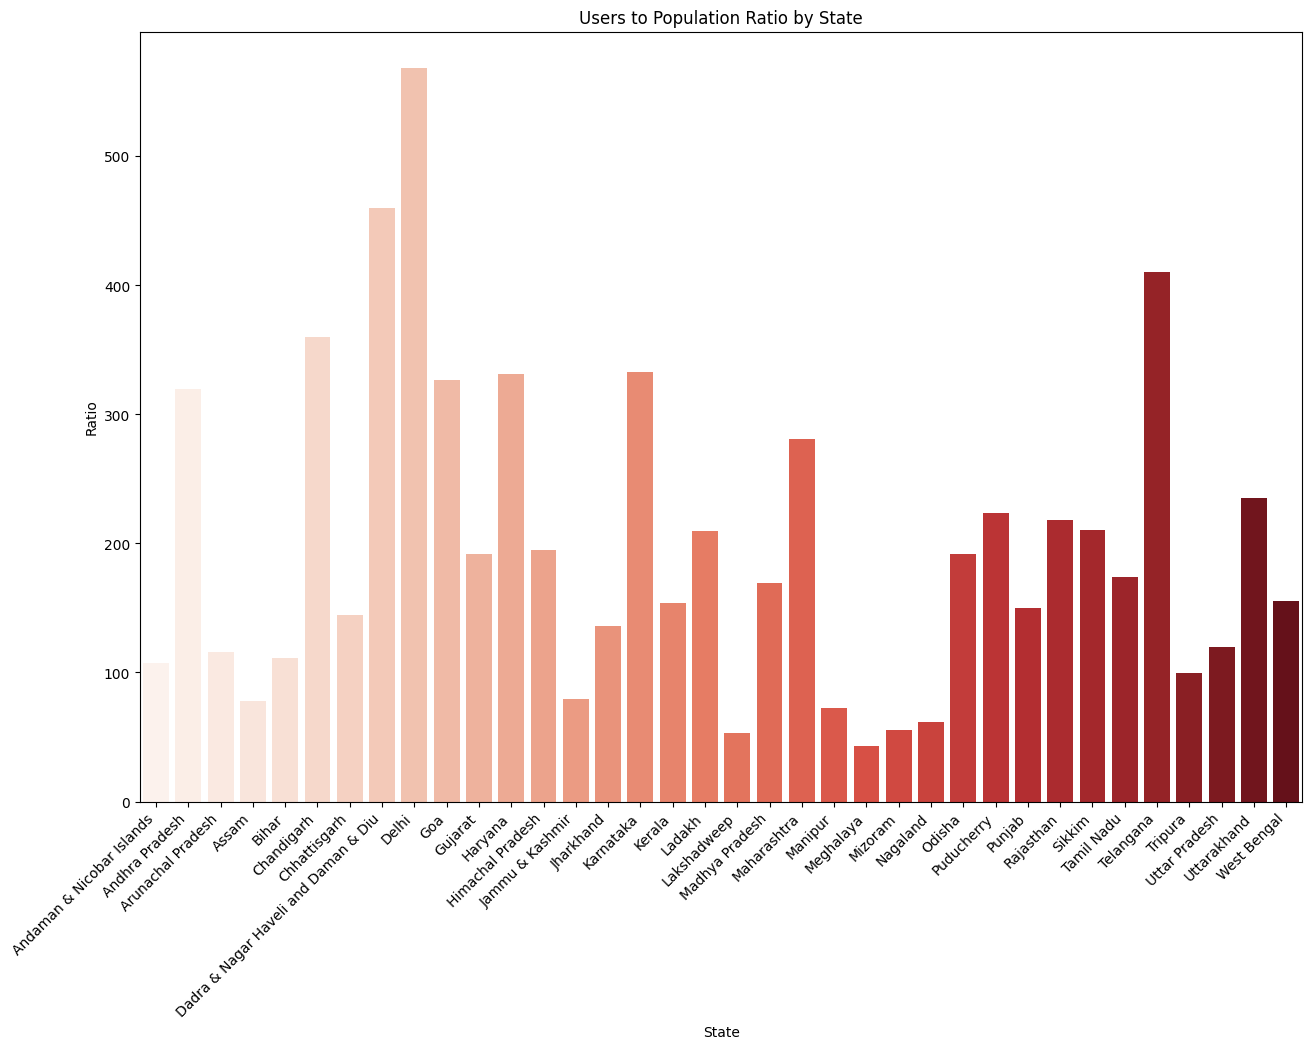

In [113]:
plt.figure(figsize=(15,10))
sns.barplot(x=users_to_pop_ratio['State'],hue=users_to_pop_ratio['State'],y=users_to_pop_ratio['Ratio'],legend=False,orient='v',palette='Reds')
plt.xlabel('State')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Ratio')
plt.title('Users to Population Ratio by State')
plt.show();

##### 4.2 Correlate Population density with transaction volume

In [114]:
# district wise correlation between transactions and population
district_merged = pd.merge(District_TxnandUsers_df,DistrictDemographics_df,how='inner',on=['State','District'])

In [115]:
# correlation
district_merged['Transactions'].corr(district_merged['Density'])

np.float64(0.30770410875592846)

Weak Positive Relation between `Transactions` and `Population`

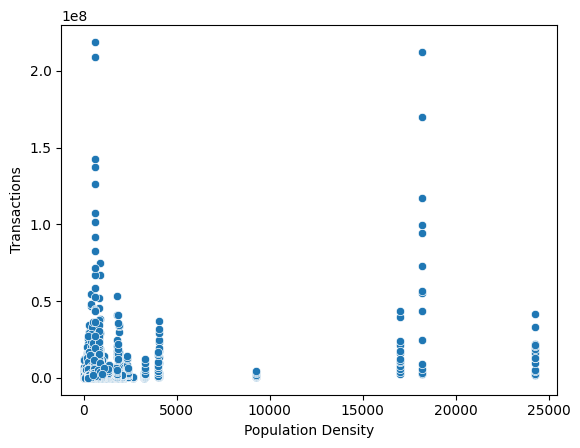

In [116]:
sns.scatterplot(y=district_merged['Transactions'],x=district_merged['Density'])
plt.xlabel('Population Density')
plt.ylabel('Transactions')
plt.show();

##### 4.3 Average Transaction amount per user

In [117]:
State_TxnandUsers_df.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [118]:
# total sum of amount and registered users of each state
avg_amount_state = State_TxnandUsers_df.groupby('State').agg({'Amount (INR)':'sum','Registered Users':'sum'}).reset_index(drop=False)

In [119]:
# calculate average transaction amount per user of each state
avg_amount_state['Avg Amount Per User'] = avg_amount_state['Amount (INR)'] / avg_amount_state['Registered Users']

In [120]:
avg_amount_state = avg_amount_state.sort_values(by='Avg Amount Per User',ascending=False)

In [121]:
# top 5 highest atv states
top_5 = avg_amount_state.head().reset_index(drop=True)
top_5.index = top_5.index + 1
top_5

State  Amount (INR)  Registered Users  Avg Amount Per User
1       Telangana  4.574246e+12         149224214         30653.509622
2  Andhra Pradesh  4.049033e+12         158007957         25625.503706
3       Karnataka  4.361396e+12         203098564         21474.282206
4       Rajasthan  2.625584e+12         149770064         17530.768707
5           Delhi  1.649942e+12          95374654         17299.587909

In [122]:
# top 5  lowest atv states
bottom_5 = avg_amount_state.tail().loc[::-1].reset_index(drop=True)
bottom_5.index = bottom_5.index + 1
bottom_5

State  Amount (INR)  Registered Users  \
1                           Lakshadweep  1.921587e+08             34223   
2                               Tripura  2.097051e+10           3661575   
3  Dadra & Nagar Haveli and Daman & Diu  1.865878e+10           2701112   
4                                Kerala  3.729599e+11          51267042   
5                      Himachal Pradesh  9.786546e+10          13373980   

   Avg Amount Per User  
1          5614.898889  
2          5727.184275  
3          6907.815954  
4          7274.846690  
5          7317.601442

##### 4.4 Device Brand Usage Ratio

In [123]:
State_DeviceData_df.head(3)

State  Year  Quarter    Brand  Registered Users  \
0  Andaman & Nicobar Islands  2018        1   Xiaomi              1665   
1  Andaman & Nicobar Islands  2018        1  Samsung              1445   
2  Andaman & Nicobar Islands  2018        1     Vivo               982   

   Percentage  
0    0.247033  
1    0.214392  
2    0.145697

In [124]:
State_TxnandUsers_df.head(3)

State  Year  Quarter  Transactions  Amount (INR)  \
0  Andaman & Nicobar Islands  2018        1          6658  1.463176e+07   
1  Andaman & Nicobar Islands  2018        2         11340  2.833854e+07   
2  Andaman & Nicobar Islands  2018        3         16265  5.555747e+07   

     ATV (INR)  Registered Users  App Opens  
0  2197.621091              6740          0  
1  2498.989022              9405          0  
2  3415.768284             12149          0

In [125]:
# total users of each state
total_users = State_TxnandUsers_df.groupby('State')['Registered Users'].sum().reset_index(drop=False)
# total registered users for each brand of a state
total_brand_users = State_DeviceData_df.groupby(['State','Brand'])['Registered Users'].sum().reset_index(drop=False)
# join two dataframes
merged_users = pd.merge(total_users,total_brand_users,how='inner',on='State')
merged_users.rename(columns = {'Registered Users_x':'Total Registered Users','Registered Users_y':'Total Brand Users'},inplace=True)

In [126]:
# calculate ratio of brand users to total  registered users
merged_users['Brand To Total Ratio'] = merged_users['Total Brand Users'] / merged_users['Total Registered Users'] * 100
merged_users.head()

State  Total Registered Users     Brand  \
0  Andaman & Nicobar Islands                  408396     Apple   
1  Andaman & Nicobar Islands                  408396    Huawei   
2  Andaman & Nicobar Islands                  408396    Lenovo   
3  Andaman & Nicobar Islands                  408396  Motorola   
4  Andaman & Nicobar Islands                  408396   OnePlus   

   Total Brand Users  Brand To Total Ratio  
0               9334              2.285527  
1              11497              2.815160  
2               5362              1.312941  
3               9491              2.323970  
4              15397              3.770115

In [127]:
# check whether calculated ratios are correct?
merged_users.loc[merged_users['State'] == 'Andaman & Nicobar Islands']['Brand To Total Ratio'].sum()

np.float64(100.0)

In [128]:
# sort merged_users dataframe on total popultaion
merged_users = merged_users.sort_values(by='Total Registered Users',ascending=False)

In [129]:
State_TxnandUsers_df.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [130]:
# top 5 states based on total number of registered users
top_5_list = State_TxnandUsers_df.groupby('State')['Registered Users'].sum().reset_index(drop=False).sort_values(by='Registered Users',ascending=False)['State'].head()
def find_top_5(r):
    if r['State'] in list(top_5_list):
        return True
    else:
        return False
top_5_bool = merged_users.apply(find_top_5,axis=1)
top_5_bool.value_counts()

False    387
True      61
Name: count, dtype: int64

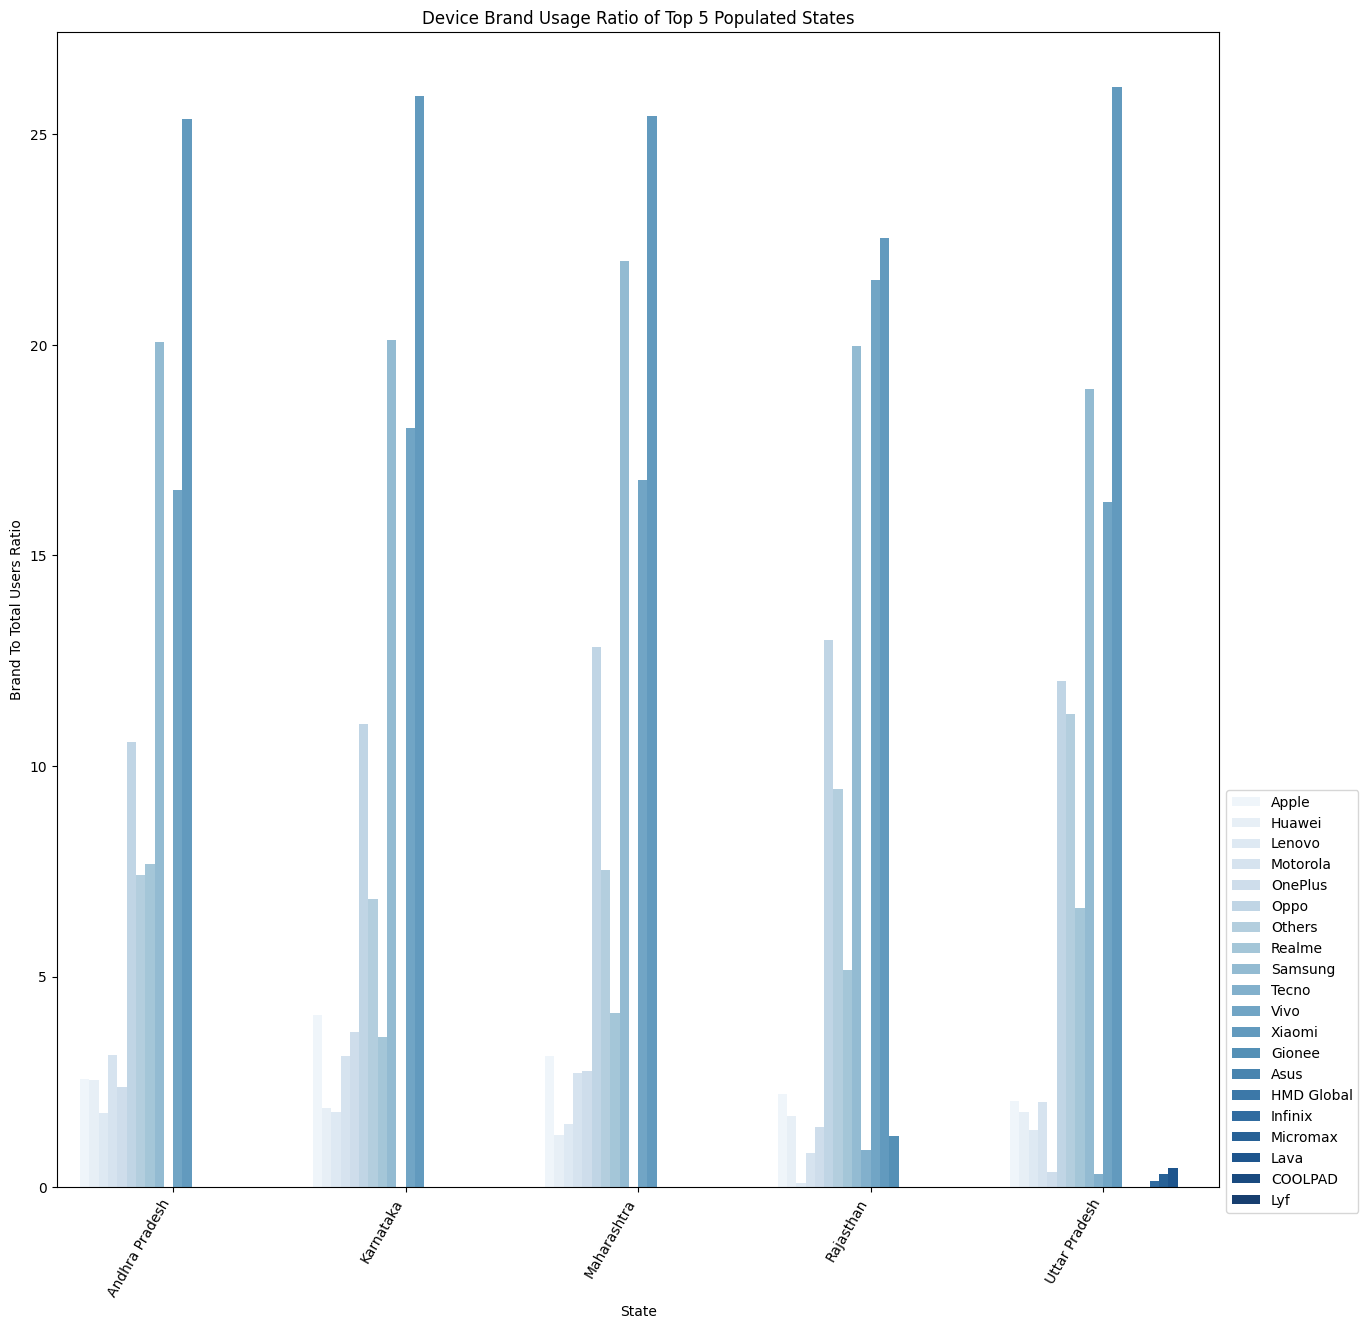

In [131]:
# top 5 states brand distribution
plt.figure(figsize=(15,15))
sns.barplot(y=merged_users['Brand To Total Ratio'].loc[top_5_bool],hue=merged_users['Brand'],x=merged_users['State'].loc[top_5_bool],palette='Blues')
plt.xlabel('State')
plt.ylabel('Brand To Total Users Ratio')
plt.xticks(rotation=60,ha='right')
plt.legend(bbox_to_anchor=(1,0.35))
plt.title('Device Brand Usage Ratio of Top 5 Populated States')
plt.show();

In [132]:
merged_users.columns

Index(['State', 'Total Registered Users', 'Brand', 'Total Brand Users',
       'Brand To Total Ratio'],
      dtype='object')

In [133]:
# to observe each brand contribution to total registered users
brand_pivot = merged_users.pivot(index='State',columns='Brand',values='Total Brand Users')
brand_pivot.fillna(0,inplace=True)
brand_pivot.head()

Brand                          Apple      Asus  COOLPAD    Gionee  HMD Global  \
State                                                                           
Andaman & Nicobar Islands     9334.0       0.0      0.0       0.0         0.0   
Andhra Pradesh             4075411.0       0.0      0.0       0.0         0.0   
Arunachal Pradesh            37607.0       0.0      0.0   24875.0         0.0   
Assam                       111898.0  401058.0      0.0  408709.0         0.0   
Bihar                       364430.0       0.0      0.0       0.0    203177.0   

Brand                         Huawei   Infinix  Lava     Lenovo  Lyf  \
State                                                                  
Andaman & Nicobar Islands    11497.0       0.0   0.0     5362.0  0.0   
Andhra Pradesh             4030184.0       0.0   0.0  2774444.0  0.0   
Arunachal Pradesh            18526.0       0.0   0.0     2461.0  0.0   
Assam                       420360.0       0.0   0.0   287876.0  0.0   
Bihar                      1865141.0  963683.0   0.0  1638006.0  0.0   

Brand                      Micromax   Motorola    OnePlus        Oppo  \
State                                                                   
Andaman & Nicobar Islands       0.0     9491.0    15397.0     36007.0   
Andhra Pradesh                  0.0  4962253.0  3742856.0  16693544.0   
Arunachal Pradesh               0.0    20476.0    20458.0    281975.0   
Assam                           0.0   417869.0        0.0   3564729.0   
Bihar                      676482.0  2097499.0        0.0  13582370.0   

Brand                          Others      Realme     Samsung     Tecno  \
State                                                                     
Andaman & Nicobar Islands     33630.0     22546.0     77065.0    1770.0   
Andhra Pradesh             11694147.0  12129196.0  31702385.0       0.0   
Arunachal Pradesh            119649.0    126074.0    366963.0       0.0   
Assam                       2886674.0   2175829.0   4102885.0       0.0   
Bihar                      10466723.0   9985296.0  23305538.0  281017.0   

Brand                            Vivo      Xiaomi  
State                                              
Andaman & Nicobar Islands     88408.0     97889.0  
Andhra Pradesh             26141988.0  40061549.0  
Arunachal Pradesh            405347.0    437803.0  
Assam                       5103507.0   6979357.0  
Bihar                      16134084.0  33721314.0

In [134]:
# calculate percentage pivot dataframe
per_brand_pivot = brand_pivot.div(brand_pivot.sum(axis=1),axis=0) * 100 # normalize

C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\3297696659.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, bottom[i] + value / 2, f'{value:.0f}%', ha='center', va='center', color='white', fontsize=8)


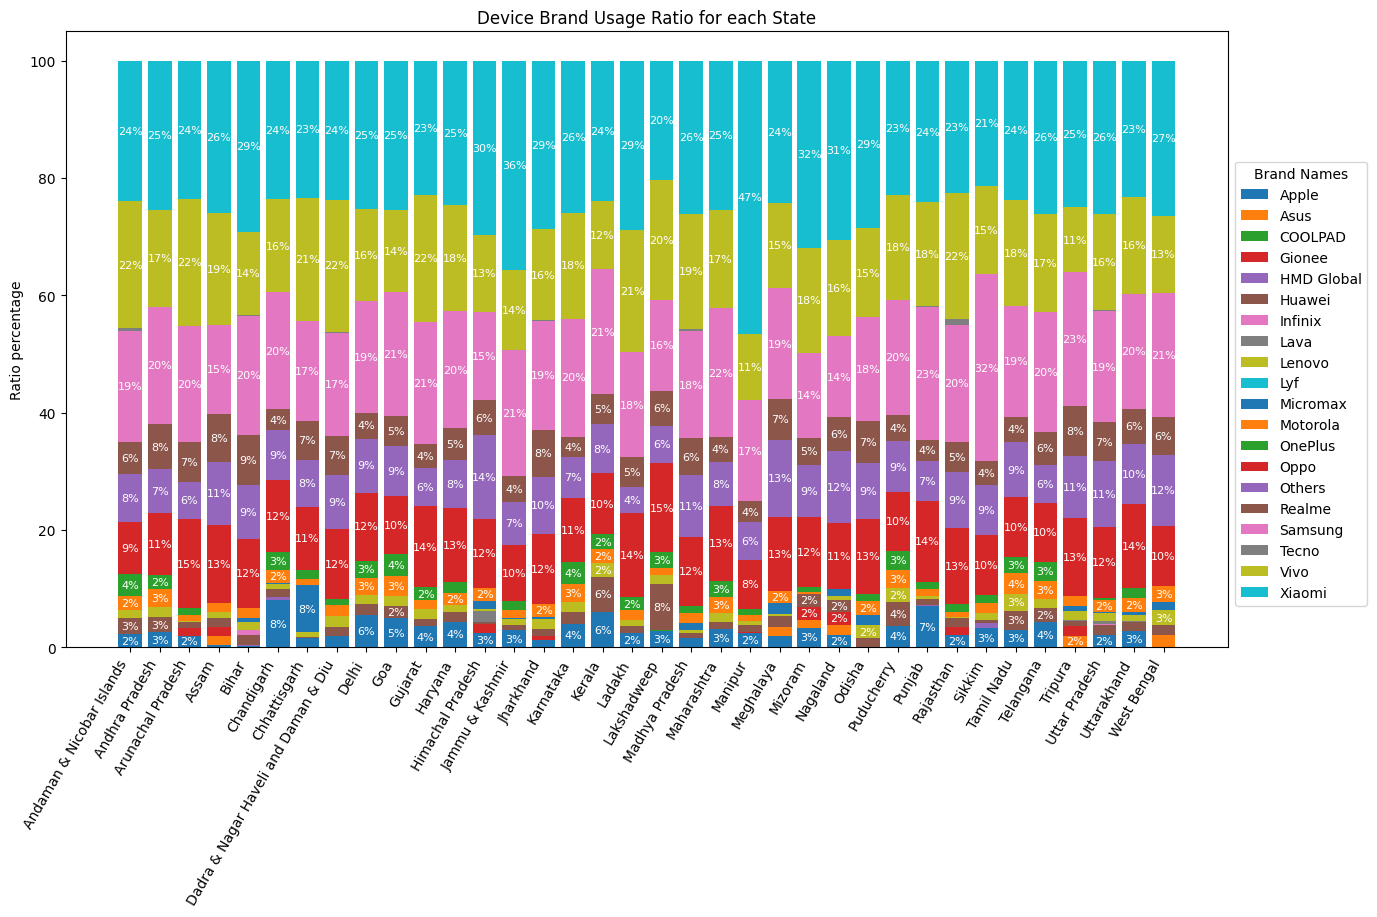

In [135]:
# visualize using stacked vertical bar chart
figs,ax = plt.subplots(figsize=(15,8))
bottom = pd.Series([0] * len(per_brand_pivot),per_brand_pivot.index)
for col in per_brand_pivot.columns:
    ax.bar(per_brand_pivot.index,per_brand_pivot[col],bottom=bottom,label=col)
    for i,value in enumerate(per_brand_pivot[col]):
        if value >= 2:
            ax.text(i, bottom[i] + value / 2, f'{value:.0f}%', ha='center', va='center', color='white', fontsize=8)
    bottom += per_brand_pivot[col]
    
ax.set_ylabel('Ratio percentage')
ax.set_title('Device Brand Usage Ratio for each State')
ax.legend(title='Brand Names',bbox_to_anchor=(1,0.8))
plt.xticks(rotation=60,ha='right')
plt.show();

Findings:
1. Nearly 75% Registered Users are from Below brands:
   1. Xiaomi
   2. Vivo
   3. Samsung
   4. Realme
   5. Oppo

#### 5. Data Visualization

##### 5.1 Total Transactions vs amount over time for Telangana

In [136]:
# create seperate df for telangana state
telangana_state_users_df = State_TxnandUsers_df.loc[State_TxnandUsers_df['State'] == 'Telangana'].reset_index(drop=True)

In [137]:
telangana_state_users_df.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

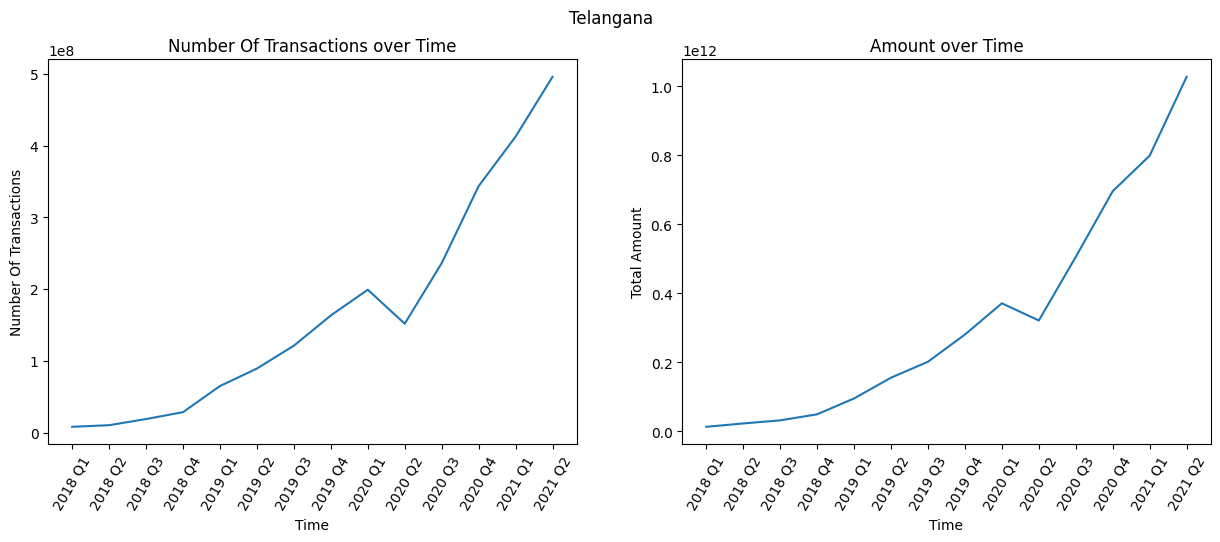

In [138]:
time_qy = telangana_state_users_df['Year'].astype(str)+' Q'+telangana_state_users_df['Quarter'].astype(str)
# plt.figure(figsize=(15,8))
figs,axes = plt.subplots(1,2,figsize=(15,5))
axes = axes.flatten()
axes[0].plot(time_qy,telangana_state_users_df['Transactions'])
axes[0].set_title('Number Of Transactions over Time')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Number Of Transactions')
axes[0].tick_params(axis='x',rotation = 60)
axes[1].plot(time_qy,telangana_state_users_df['Amount (INR)'])
axes[1].set_title('Amount over Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Total Amount')
axes[1].tick_params(axis='x',rotation = 60)
plt.suptitle('Telangana') # to add main title
plt.show();

##### 5.2 Pie Chart for transaction type Distribution of 2021 Q2 In Telangana

In [139]:
telangana_user_type_df = State_TxnSplit_df.loc[State_TxnSplit_df['State'] == 'Telangana']
t_2021_q2_df = telangana_user_type_df.loc[(telangana_user_type_df['Year'] == 2021)&(telangana_user_type_df['Quarter'] == 2)]

In [140]:
t_2021_q2_df = t_2021_q2_df.sort_values(by='Transaction Type')

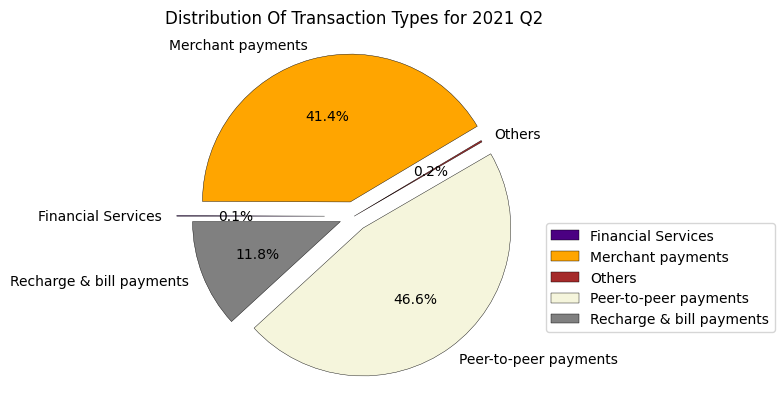

In [141]:
explode=[0.2,0.1,0,0.1,0.1]
colors = ("indigo" ,"orange", "brown",
          "beige","grey" )
wp={'linewidth':0.3,'edgecolor':'black'}
plt.pie(t_2021_q2_df['Transactions'],labels=t_2021_q2_df['Transaction Type'],wedgeprops=wp,colors=colors,autopct='%1.1f%%',explode = explode,startangle=180,counterclock=False)
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('Distribution Of Transaction Types for 2021 Q2')
plt.show();

##### 5.3 Visualize Population density of districts in Telangana

In [142]:
districts_telangana_df = DistrictDemographics_df.loc[DistrictDemographics_df['State'] == 'Telangana'].reset_index(drop=True)

In [143]:
districts_telangana_df.sort_values(by='Density',ascending=False).head()

State            District Headquarters  Population  Area (sq km)  \
3   Telangana           Hyderabad    Hyderabad     3943323        217.00   
15  Telangana  Medchal–Malkajgiri    Shamirpet     2542203       5005.98   
30  Telangana      Warangal Urban     Warangal     1135707       1304.50   
24  Telangana         Ranga Reddy   Shamshabad     2551731       1038.00   
9   Telangana          Karimnagar   Karimnagar     1016063       2379.07   

    Density  Code      Alternate Name  
3     18172  TG03           Hyderabad  
15     2251  TG16  Medchal Malkajgiri  
30      826  TG32      Warangal Urban  
24      486  TG25          Rangareddy  
9       473  TG09          Karimnagar

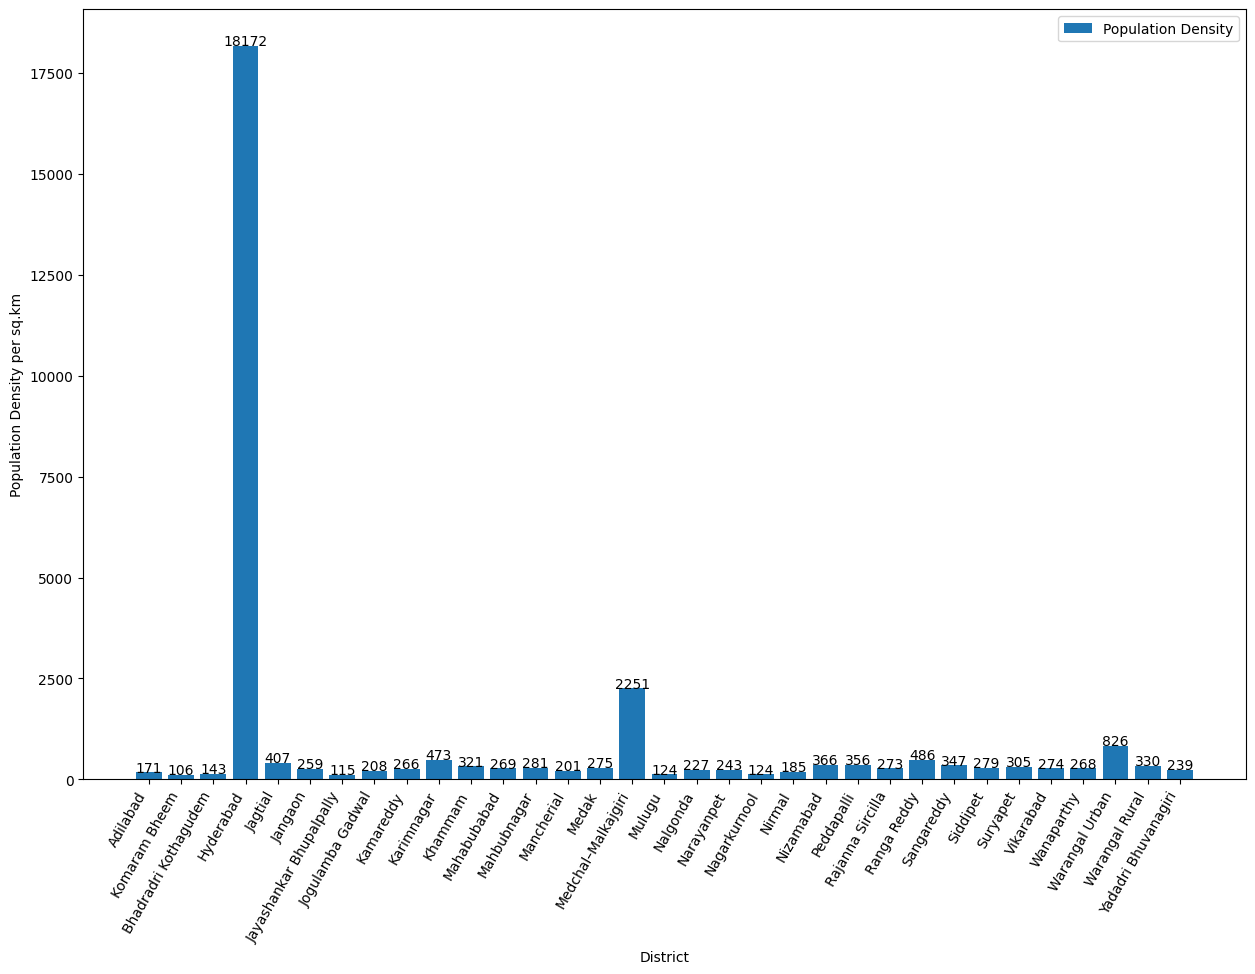

In [144]:
plt.figure(figsize=(15,10))
plt.bar(districts_telangana_df['District'],districts_telangana_df['Density'],label='Population Density')
for i,value in enumerate(districts_telangana_df['Density']):
    plt.text(i,value+110 , f'{value}',ha='center',va='center',fontsize=10,color='black')
plt.xticks(rotation=60,ha='right')
plt.xlabel('District')
plt.ylabel('Population Density per sq.km')
plt.legend()
plt.show();

#### 6.Insights and Conclusions

##### 6.1 Any trends or Patterns in Transaction Data

In [145]:
State_TxnandUsers_df.head()

State  Year  Quarter  Transactions  Amount (INR)  \
0  Andaman & Nicobar Islands  2018        1          6658  1.463176e+07   
1  Andaman & Nicobar Islands  2018        2         11340  2.833854e+07   
2  Andaman & Nicobar Islands  2018        3         16265  5.555747e+07   
3  Andaman & Nicobar Islands  2018        4         23758  9.054834e+07   
4  Andaman & Nicobar Islands  2019        1         30486  1.022997e+08   

     ATV (INR)  Registered Users  App Opens  
0  2197.621091              6740          0  
1  2498.989022              9405          0  
2  3415.768284             12149          0  
3  3811.277720             15222          0  
4  3355.630147             18596          0

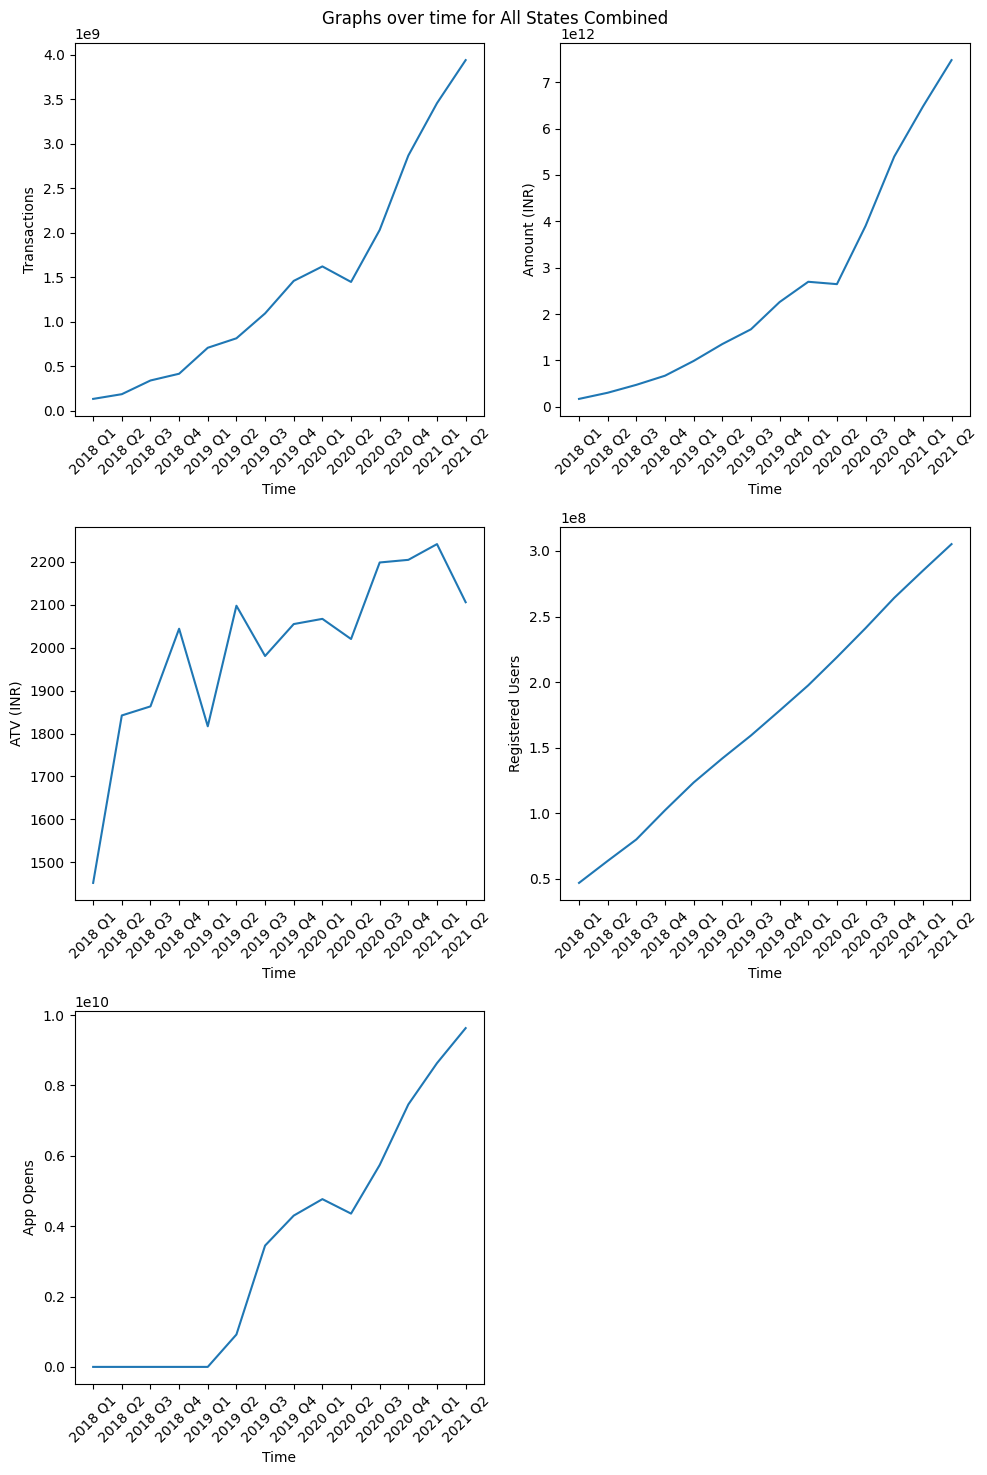

In [146]:
#total overally growth of transaction,amount over time
quarter_year = State_TxnandUsers_df['Year'].astype(str)+' Q'+State_TxnandUsers_df['Quarter'].astype(str)
figs,axes = plt.subplots(3,2,figsize=(10,15))
axes = axes.flatten()
graph_list=['Transactions','Amount (INR)','ATV (INR)','Registered Users','App Opens']
fun = ['sum','sum','mean','sum','sum']
for (i,value),fn_value in zip(enumerate(graph_list),fun):
    axes[i].plot(quarter_year.unique(),State_TxnandUsers_df.groupby(['Year','Quarter'])[value].agg(fn_value))
    axes[i].tick_params(axis='x',rotation = 45)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(f'{value}')
axes[5].set_axis_off()
plt.suptitle('Graphs over time for All States Combined')
plt.tight_layout()
plt.show();

Findings
observed downward peak from 2020 Q1 to 2020 Q2 in every graph 
1. Reason for downward : 
 covid 19 began to spread globally in early 2020,so various countries implemented lockdowns,travel restrictions around that time leading to decline in customer spending,business activity and economic transactions 

2. Reason for continous Growth after 2020 Q2 : 
Due to the pandemic, companies across all sectors transitioned to providing their services in a digital format.So volume of Digital Transaction increased exponentially

In [147]:
#transaction type distribution by percentage
trans_type_df = State_TxnSplit_df.groupby(['Transaction Type','Year','Quarter'])['Transactions'].sum().reset_index(drop=False)

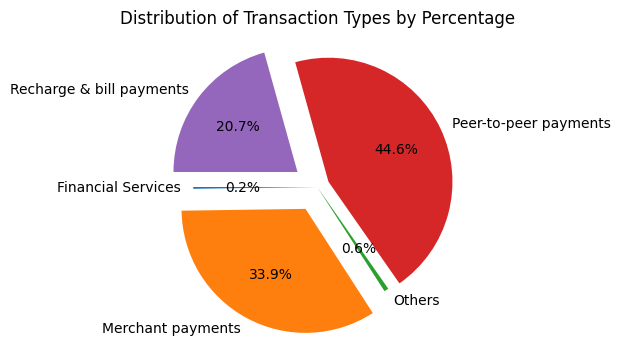

In [148]:
t_type = trans_type_df.groupby('Transaction Type')['Transactions'].sum()
wp={'linewidth': 0.3,'edgecolor':'white'}
plt.figure(figsize=(4,6))
plt.pie(t_type,labels=t_type.index,startangle=180,autopct='%1.1f%%',explode=[0,0.2,0,0.1,0.2])
# plt.legend(bbox_to_anchor=(1,0.5))
plt.title('Distribution of Transaction Types by Percentage')
plt.show();

Findings :
1. P2P payments and merchant payments together make up the bulk of the transaction volume, showing the heavy reliance on PhonePe for personal money transfers and purchases.
2. Enhance Financial Service Utilization:
   1. Increase awarness of financial services like inusrance payment,mutual funds,loans through targeted digital campaigns and customer education initiatives
   2. Collaborate with financial institutions to provide bundled services directly through platform
3. Boost Adaption for `others` services
   1. Run promotions for these lesser used services to increase awareness and adoption
   2. expand services that offered under this category to include day to day activities like public transport tickets,parking payments
      

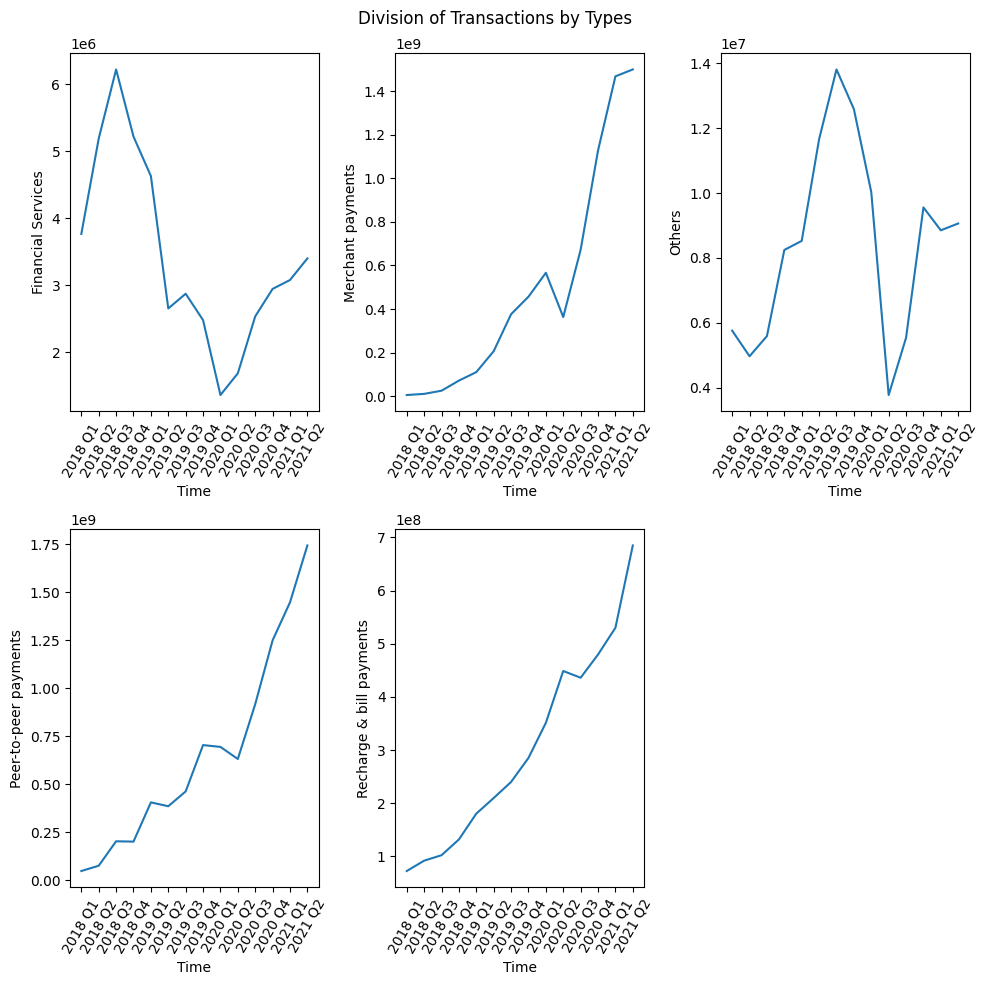

In [149]:
#seperate growth of each transaction type over time
sectors = trans_type_df['Transaction Type'].unique()
figs , axes = plt.subplots(2,3,figsize=(10,10))
axes = axes.flatten()
for i,sector in enumerate(sectors):
    sector_data = trans_type_df.loc[trans_type_df['Transaction Type'] == sector]
    quar_year = sector_data['Year'].astype(str)+' Q'+sector_data['Quarter'].astype(str)
    axes[i].plot(quar_year,sector_data['Transactions'])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(f'{sector}')
    axes[i].tick_params(axis='x',rotation=60)
for k in range(len(sectors),len(axes)):
    axes[k].set_axis_off()
plt.suptitle('Division of Transactions by Types')
plt.tight_layout()
plt.show();    

Findings based on Transaction Types:
1. `Recharge & bill payments` unaffected by anything,its increased as people habituated for simple and faster way of doing things and everything digitalized
2. `Peer-to-peer payments` and `Merchant payments` affected due to implementation of lockdowns,gathering restrictions due to covid 19 ,but gradually increased as everything transitioned into digital
3. `Financial Services` and `Others` hit their lowest during first half of 2020 due to covid pandemic
4. `Financial Services` hit its peak in middle of 2018 due to policy changes and banking reforms introduced by government and RBI , decreased the NPA(Non-Performing Asset) inturn decreased bad or default loans and turned banks to lend more money

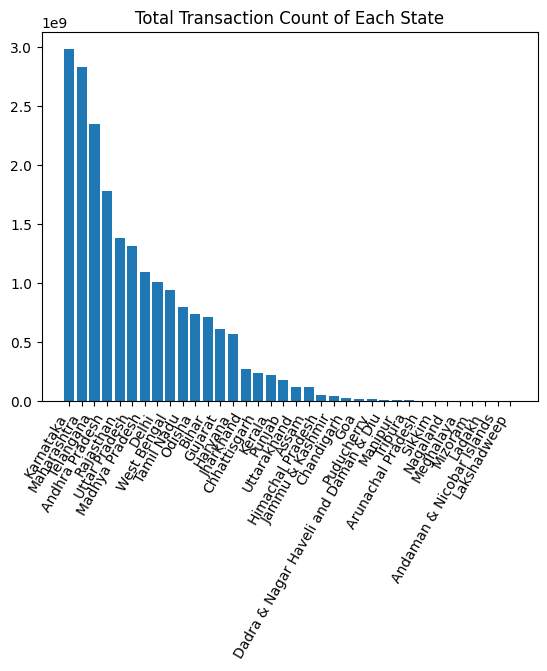

In [150]:
temp_df = State_TxnandUsers_df.groupby('State')['Transactions'].sum().sort_values(ascending=False)
plt.bar(temp_df.index,temp_df)
plt.xticks(rotation=60,ha='right')
plt.title('Total Transaction Count of Each State')
plt.show();

In [151]:
# Check growth rates for top 5 states based on total transaction count
top_5_trans_states = temp_df.head().index

In [152]:
top_5_trans_states

Index(['Karnataka', 'Maharashtra', 'Telangana', 'Andhra Pradesh', 'Rajasthan'], dtype='object', name='State')

In [153]:
def get_increase(df):
    # df['Prev Trans'] = df['Transactions'].shift(1)
    df['Trans Growth Rate'] = ((df['Transactions'] - df['Transactions'].shift(1)) / df['Transactions'].shift(1)) *100
    df['Users Growth Rate'] = ((df['Registered Users'] - df['Registered Users'].shift(1)) / df['Registered Users'].shift(1)) *100
    df['Atv Growth Rate'] = ((df['ATV (INR)'] - df['ATV (INR)'].shift(1)) / df['ATV (INR)'].shift(1)) *100
    return df
growth_rate_state_df = State_TxnandUsers_df.groupby('State').apply(get_increase)
# growth_rate_state_df = growth_rate_state_df.reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3556\3397291263.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_rate_state_df = State_TxnandUsers_df.groupby('State').apply(get_increase)


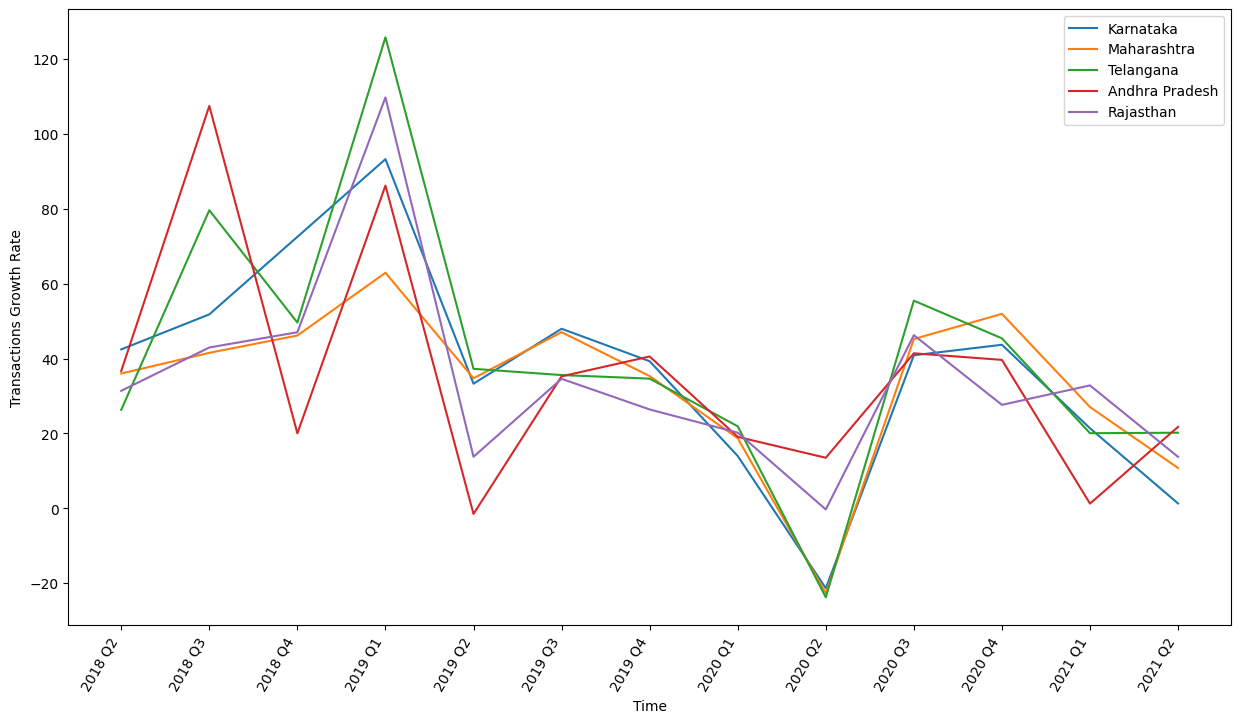

In [154]:
plt.figure(figsize=(15,8))
quar_year = State_TxnandUsers_df['Year'].astype(str)+' Q'+State_TxnandUsers_df['Quarter'].astype(str)
quar_year = quar_year.unique()
for value in top_5_trans_states:
    plt.plot(quar_year,growth_rate_state_df.loc[value,'Trans Growth Rate'],label=value)
plt.xlabel('Time')
plt.ylabel('Transactions Growth Rate')
plt.xticks(rotation=60,ha='right')
plt.legend()
plt.show();

In [155]:
# get max and min of each quarter
growth_rate_state_df = growth_rate_state_df.reset_index(drop=True)
temp_df = growth_rate_state_df.groupby(['Year','Quarter']).agg(max_rate=('Trans Growth Rate','max'),min_rate=('Trans Growth Rate','min'),avg_rate=('Trans Growth Rate','mean')).reset_index(drop=False)

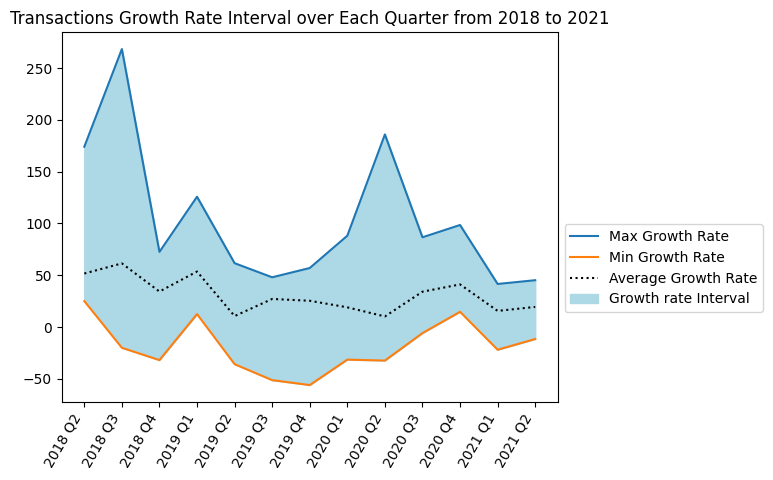

In [156]:
# temp_df = temp_df.fillna(0)
# max_avg_point = pd.Series([temp_df['avg_rate'].max() for _ in range(14)])
# min_avg_point = pd.Series([temp_df['avg_rate'].min() for _ in range(14)])
plt.plot(quar_year,temp_df['max_rate'],label='Max Growth Rate')
plt.plot(quar_year,temp_df['min_rate'],label='Min Growth Rate')
plt.plot(quar_year,temp_df['avg_rate'],label='Average Growth Rate',color='black',linestyle='dotted')
# plt.plot(quar_year,max_avg_point,label='Max Average Growth Rate',color='lightgrey')
# plt.plot(quar_year,min_avg_point,label='Min Average Growth Rate',color='lightgrey')
plt.xticks(rotation=60,ha='right')
plt.fill_between(quar_year,temp_df['max_rate'],temp_df['min_rate'],where=(temp_df['max_rate']>=temp_df['min_rate']),color='lightblue',label='Growth rate Interval')
# plt.fill_between(quar_year,max_avg_point,temp_df['max_rate'],where=(max_avg_point >temp_df['max_rate']),interpolate=True,color='white',label='Growth rate Interval')
# plt.fill_between(quar_year,max_avg_point,min_avg_point,where=(max_avg_point > min_avg_point),color='lightgrey',label='Avg Growthrate Range')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('Transactions Growth Rate Interval over Each Quarter from 2018 to 2021')
plt.show();

Findings:
1. The Overall average growth rate remained consistent after mid-2019, showing little to no variation in quarterly growth
2.  The significant gap between the maximum and minimum growth rates highlights the `need for strategies` to stabilize growth and reduce volatility
3.  Suggestions: development of `easy to use` User Interface,Collaborations with Brands and Promotions would improve growth

In [157]:
temp_df = growth_rate_state_df.groupby(['Year','Quarter']).agg(max_users_rate=('Users Growth Rate','max'),min_users_rate=('Users Growth Rate','min'),avg_users_rate=('Users Growth Rate','mean'))

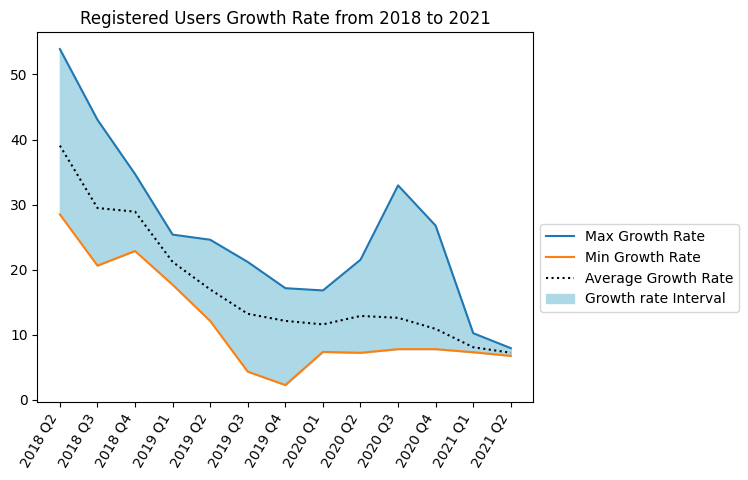

In [158]:
plt.plot(quar_year,temp_df['max_users_rate'],label='Max Growth Rate')
plt.plot(quar_year,temp_df['min_users_rate'],label='Min Growth Rate')
plt.plot(quar_year,temp_df['avg_users_rate'],label='Average Growth Rate',color='black',linestyle='dotted')
plt.xticks(rotation=60,ha='right')
plt.fill_between(quar_year,temp_df['max_users_rate'],temp_df['min_users_rate'],where=(temp_df['max_users_rate']>=temp_df['min_users_rate']),color='lightblue',label='Growth rate Interval')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('Registered Users Growth Rate from 2018 to 2021')
plt.show();

Findings :
1. The Rate of new User onboarding fell below 10% by the end of 2020.
2. The Overall average growth rate remained consistent after mid-2019, showing little to no variation in quarterly growth

##### 6.2 Correlate Deomraphic data with transaction data

In [159]:
state_population = DistrictDemographics_df.groupby('State')['Density'].sum().reset_index(drop=False)
state_total_trans = State_TxnandUsers_df.groupby('State')['Transactions'].sum().reset_index(drop=False)

In [160]:
temp_df = pd.merge(state_total_trans,state_population,how='inner',on='State')

In [161]:
temp_df['Density'].corr(temp_df['Transactions'])

np.float64(0.39684437273582057)

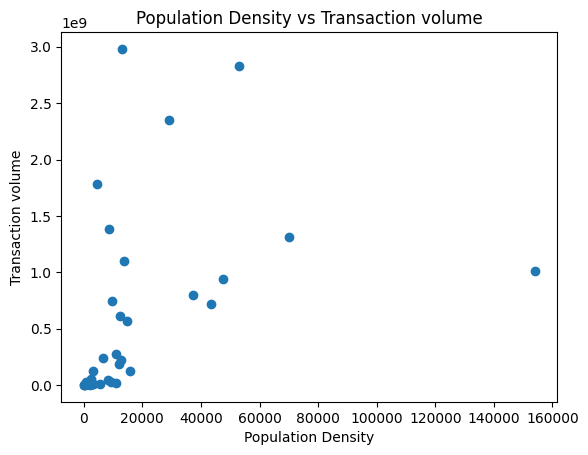

In [162]:
plt.scatter(x=temp_df['Density'],y=temp_df['Transactions'])
plt.xlabel('Population Density')
plt.ylabel('Transaction volume')
plt.title('Population Density vs Transaction volume')
plt.show();

Findings : Weak relation between population density and transaction volume of states

##### 6.3 Summarize findings and insights

Findings:
1. Strong correlation observed between the number of transactions and the total amount.
2. In some states, the ratio of registered users to the overall population exceeds 100.
3. Nearly 75% of registered users belong to just five brands: Xiaomi, Vivo, Samsung, Realme, and Oppo.
4. A downward trend was observed in the number of transactions, total amount, and app opens during the COVID-19 pandemic, except for registered user growth.
5. An upward trend was observed after Q2 2020, driven by the shift towards digitalization.
6. P2P and merchant payments account for the majority of transaction volumes, while the financial and 'others' sectors contribute the least.
7. Every sector (transaction type) was impacted by the COVID-19 pandemic, except for the recharge and bills sector.
8. The overall average growth rate remained consistent after mid-2019, showing little to no quarterly variation.
9. High volatility was observed in the overall growth rate of transactions.
10. The average rate of registered user growth remained consistent after mid-2019, with little to no variation.
11. A weak correlation was observed between population density and the transaction volume in different states.

Actionable Recommendations:
1. Enhance Financial Service Utilization:
   1. Increase awarness of financial services like inusrance payment,mutual funds,loans through targeted digital campaigns and customer education initiatives
   2. Collaborate with financial institutions to provide bundled services directly through platform
      
2. Boost Adaption for others services
   1. un promotions for these lesser used services to increase awareness and adoption
   2. expand services that offered under this category to include day to day activities like public transport tickets,parking payments
      
3. To Improve Growth of Transactions,App Users
   1. Improve User Experience: simply User journey and provide AI recommended personal offers and discounts based on user behaviour,user engagement
   2. Reward Programs: Introduce loyality or cashback programs for frequent users
   3. Gamification: Add elements(ex: challenges,leaderboards,rewards) to encourage competition and frequent use
      
4. Target Existing Users
   1. Promote Features: Encourage existing users to explore other services or features they aren't using
      
5. Implement predictive analytics to anticipate when users are likely to stop using the platform and offer pre-emptive retention strategies like discounts,cashbacks etc.

6.  Develop campaigns targeted at reactivating users who have been inactive for some time.

7. Since P2P and merchant payments dominate transaction volumes, consider enhancing these services with more convenient features (like instant refunds, credit options) to retain users.